# Dataset Upload

In addition to creating and editing Datasets in the LangSmith UI, you can also create and edit datasets with the LangSmith SDK.

Let's go ahead an upload a list of examples that we have from our RAG application to LangSmith as a new dataset.

In [9]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [10]:
from langsmith import Client

example_inputs = [
("How do I set up tracing to LangSmith if I'm using LangChain?", "To set up tracing to LangSmith while using LangChain, you need to set the environment variable `LANGSMITH_TRACING` to 'true'. Additionally, you must set the `LANGSMITH_API_KEY` environment variable to your API key. By default, traces will be logged to a project named \"default.\""),
("How can I trace with the @traceable decorator?", "To trace with the @traceable decorator in Python, simply decorate any function you want to log traces for by adding `@traceable` above the function definition. Ensure that the LANGSMITH_TRACING environment variable is set to 'true' to enable tracing, and also set the LANGSMITH_API_KEY environment variable with your API key. By default, traces will be logged to a project named \"default,\" but you can configure it to log to a different project if needed."),
("How do I pass metadata in with @traceable?", "You can pass metadata with the @traceable decorator by specifying arbitrary key-value pairs as arguments. This allows you to associate additional information, such as the execution environment or user details, with your traces. For more detailed instructions, refer to the LangSmith documentation on adding metadata and tags."),
("What is LangSmith used for in three sentences?", "LangSmith is a platform designed for the development, monitoring, and testing of LLM applications. It enables users to collect and analyze unstructured data, debug issues, and create datasets for testing and evaluation. The tool supports various workflows throughout the application development lifecycle, enhancing the overall performance and reliability of LLM applications."),
("What testing capabilities does LangSmith have?", "LangSmith offers capabilities for creating datasets of inputs and reference outputs to run tests on LLM applications, supporting a test-driven approach. It allows for bulk uploads of test cases, on-the-fly creation, and exporting from application traces. Additionally, LangSmith facilitates custom evaluations to score test results, enhancing the testing process."),
("Does LangSmith support online evaluation?", "Yes, LangSmith supports online evaluation as a feature. It allows you to configure a sample of runs from production to be evaluated, providing feedback on those runs. You can use either custom code or an LLM as a judge for the evaluations."),
("Does LangSmith support offline evaluation?", "Yes, LangSmith supports offline evaluation through its evaluation how-to guides and features for managing datasets. Users can manage datasets for offline evaluations and run various types of evaluations, including unit testing and auto-evaluation. This allows for comprehensive testing and improvement of LLM applications."),
("Can LangSmith be used for finetuning and model training?", "Yes, LangSmith can be used for fine-tuning and model training. It allows you to capture run traces from your deployment, query and filter this data, and convert it into a format suitable for fine-tuning models. Additionally, you can create training datasets to keep track of the data used for model training."),
("Can LangSmith be used to evaluate agents?", "Yes, LangSmith can be used to evaluate agents. It provides various evaluation strategies, including assessing the agent's final response, evaluating individual steps, and analyzing the trajectory of tool calls. These methods help ensure the effectiveness of LLM applications."),
("How do I create user feedback with the LangSmith sdk?", "To create user feedback with the LangSmith SDK, you first need to run your application and obtain the `run_id`. Then, you can use the `create_feedback` method, providing the `run_id`, a feedback key, a score, and an optional comment. For example, in Python, it would look like this: `client.create_feedback(run_id, key=\"feedback-key\", score=1.0, comment=\"comment\")`."),
]

client = Client()
# TODO: Fill in dataset id
dataset_id = "5089da53-878c-4884-be32-ae08af9099ee"

# Prepare inputs and outputs for bulk creation
inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
  inputs=inputs,
  outputs=outputs,
  dataset_id=dataset_id,
)

{'example_ids': ['d0967bfc-73ae-45d2-904f-45a9f8532877',
  'f7309db8-9cbd-4564-9d68-fa4222c5b246',
  '244cb784-9bb6-4adf-a064-b072a3e1c5c9',
  '61287e02-6887-407d-9abc-b7c2a4288c93',
  'f54fecb2-fb97-476d-abc6-adf9242dd9cf',
  'b4436f86-8cd3-44eb-bd06-1f68f1c94750',
  '1bf45575-6078-478b-a209-41f63d169af8',
  '3533a525-3638-4b78-8f71-b1e52765485e',
  'dc60f4f0-c31e-4a69-9d5e-df2176401eb1',
  'b834b374-bcdd-4fa8-8545-196e4de07362'],
 'count': 10}

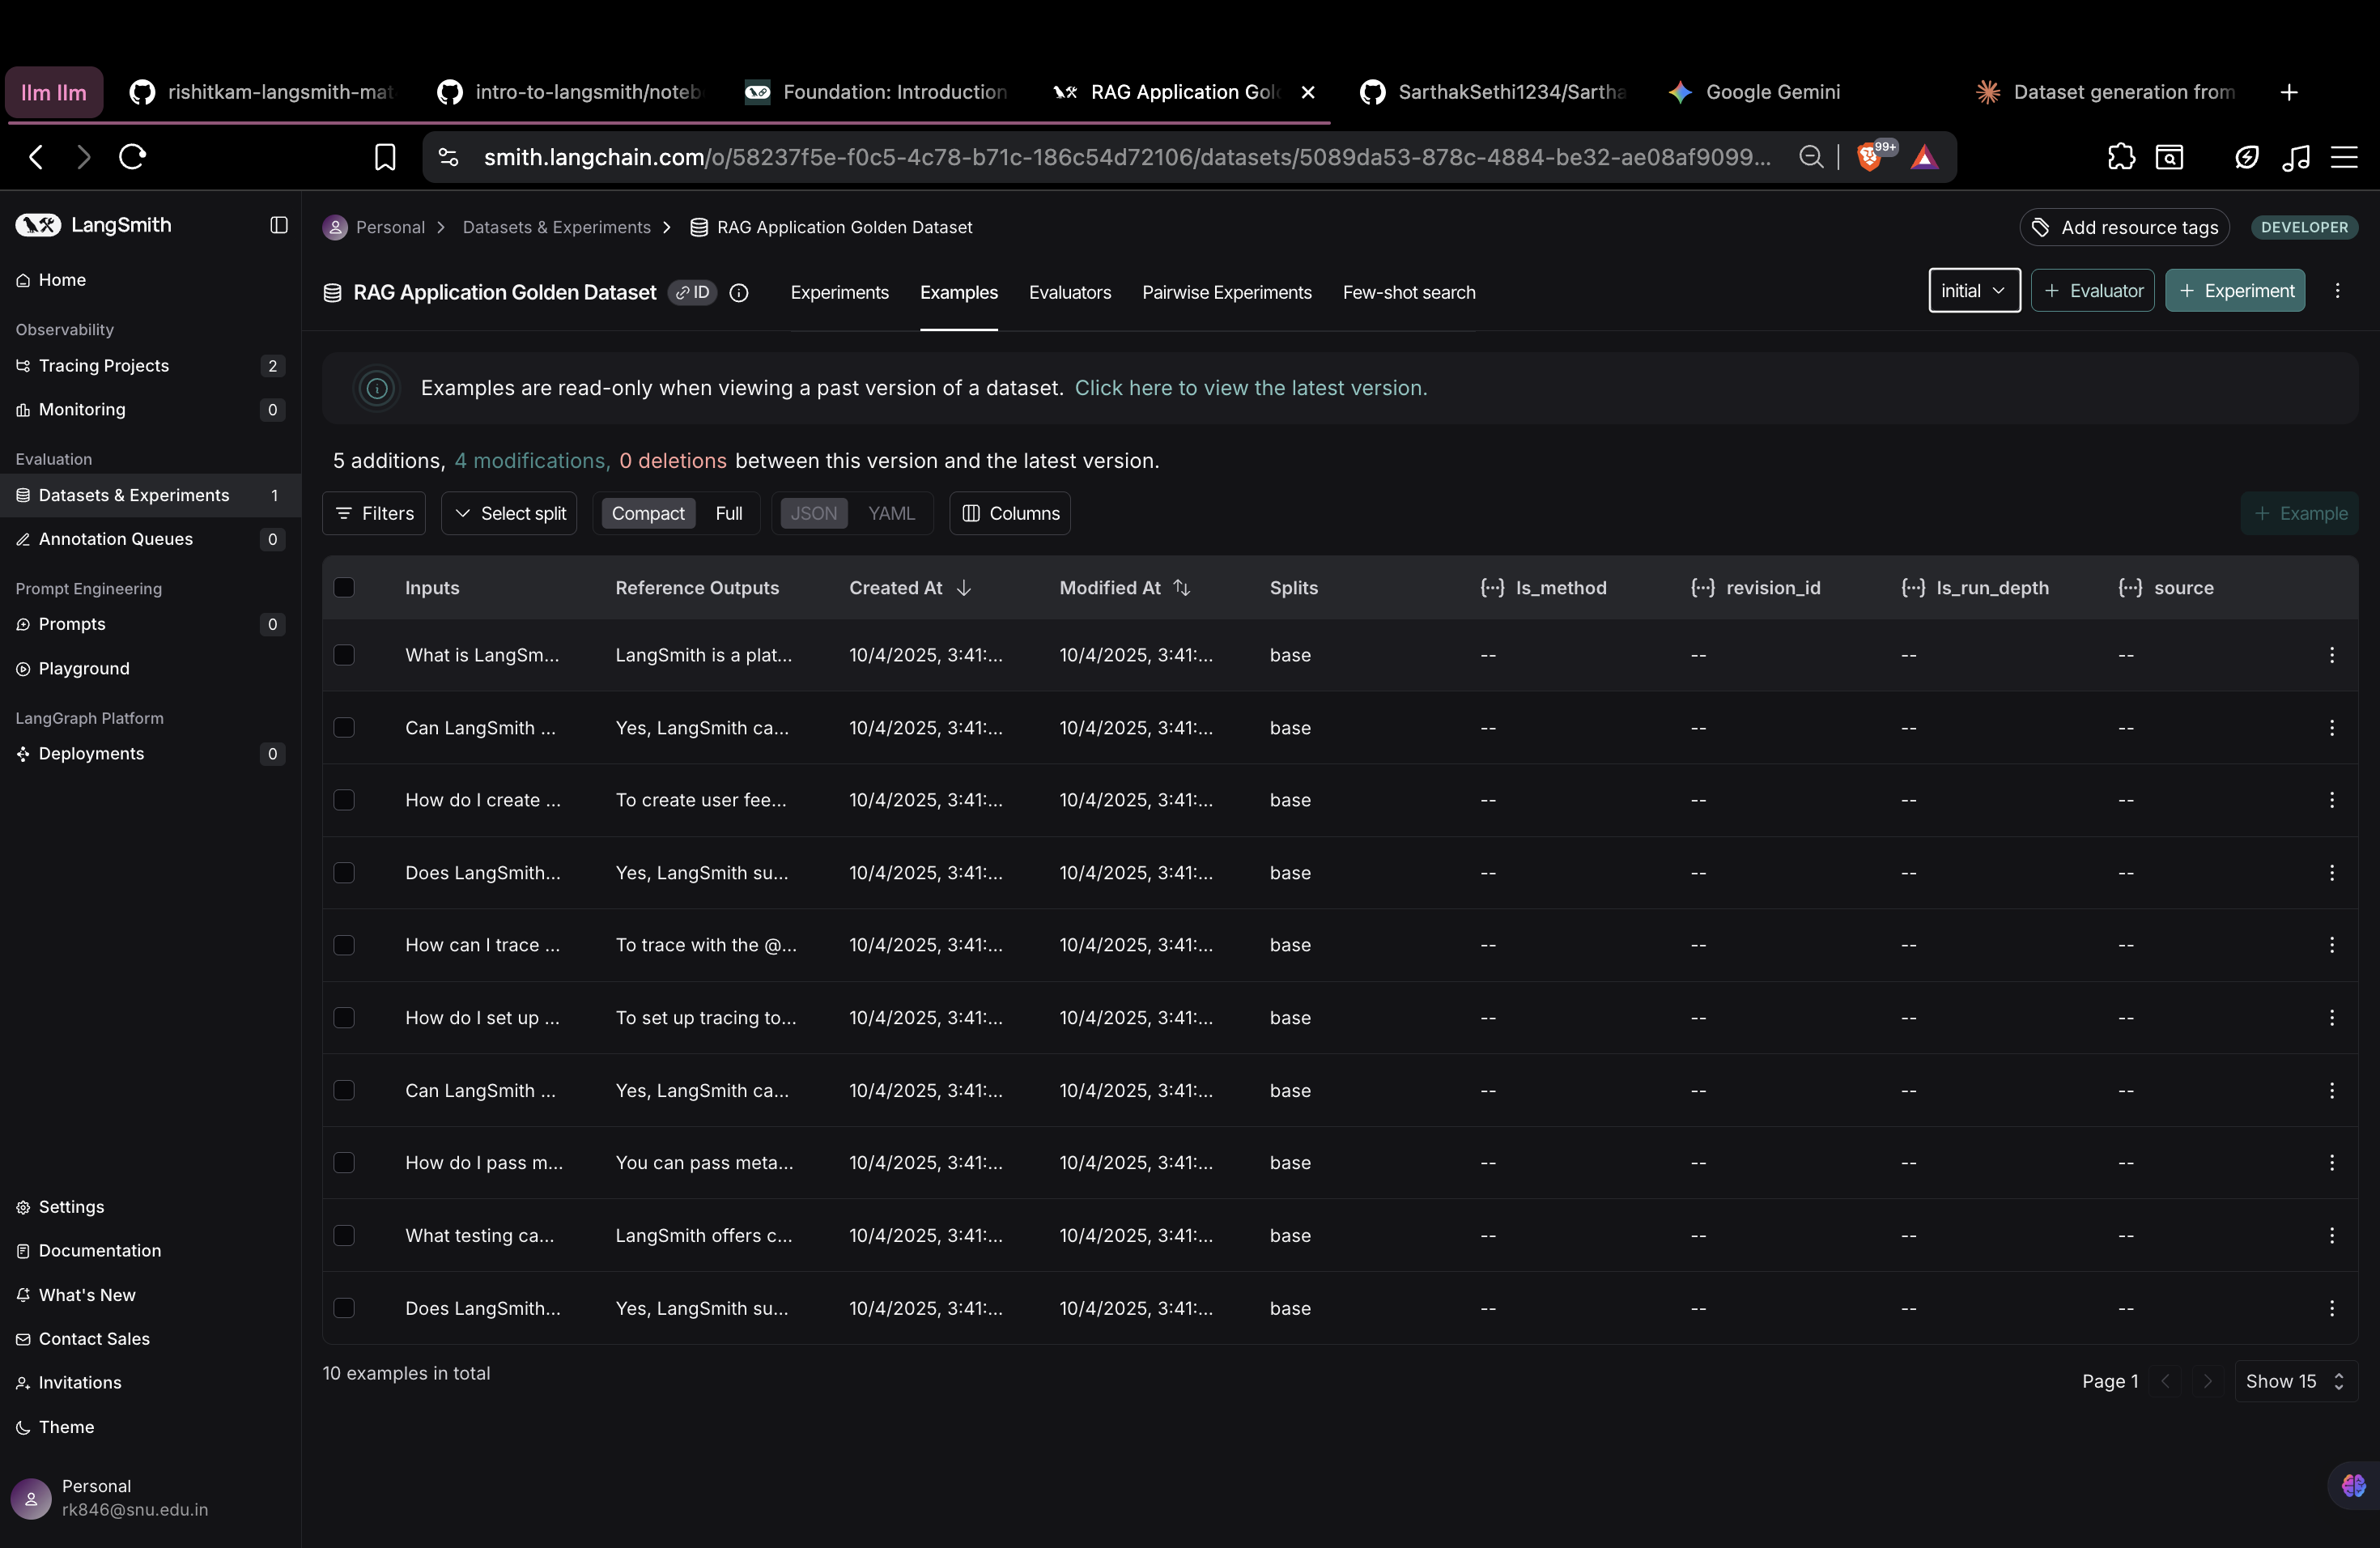

We populated the dataset named RAG Application Golden dataset, we named golden dataset because it means that the dataset contains good examples which set a high expectation for our test subject.

## Submitting another Trace

I've moved our RAG application definition to `app.py` so we can quickly import it.

In [11]:
from app import langsmith_rag

Let's ask another question to create a new trace!

In [12]:
question = "How do I set up tracing to LangSmith if I'm using LangChain?"
langsmith_rag(question)

'To set up tracing to LangSmith when using LangChain, ensure your LangSmith instance is running and accessible. You can log traces by passing the hostname to the LangChain tracer or LangSmith SDK, and for best security practices, configure DNS, SSL, authentication methods, and secure your Docker environment. For detailed instructions, refer to the self-hosted usage guide provided by LangSmith.'

## I created and added traces in the dataset that we populated earlier

In [13]:
question = "How do i pass metadata in with @traceable?"
langsmith_rag(question)

'You can pass metadata in with the `@traceable` function by including it in the `experimental_telemetry` object when you call the traced function. For example, you can set `metadata: { userId: "123", language: "english" }` within `experimental_telemetry`. This metadata will then be visible in your LangSmith dashboard and can be used for filtering and searching traces.'

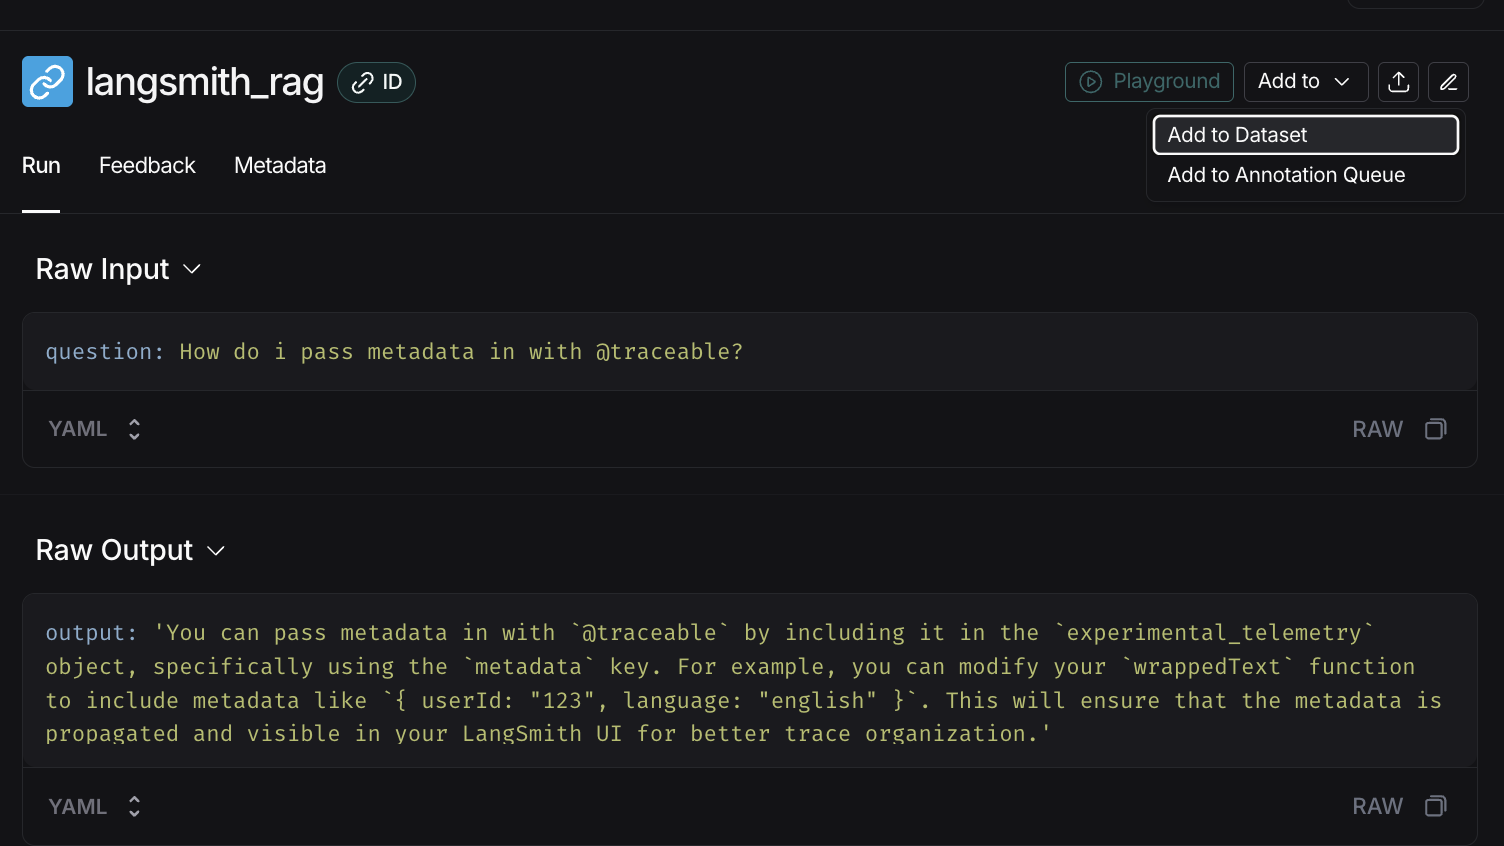

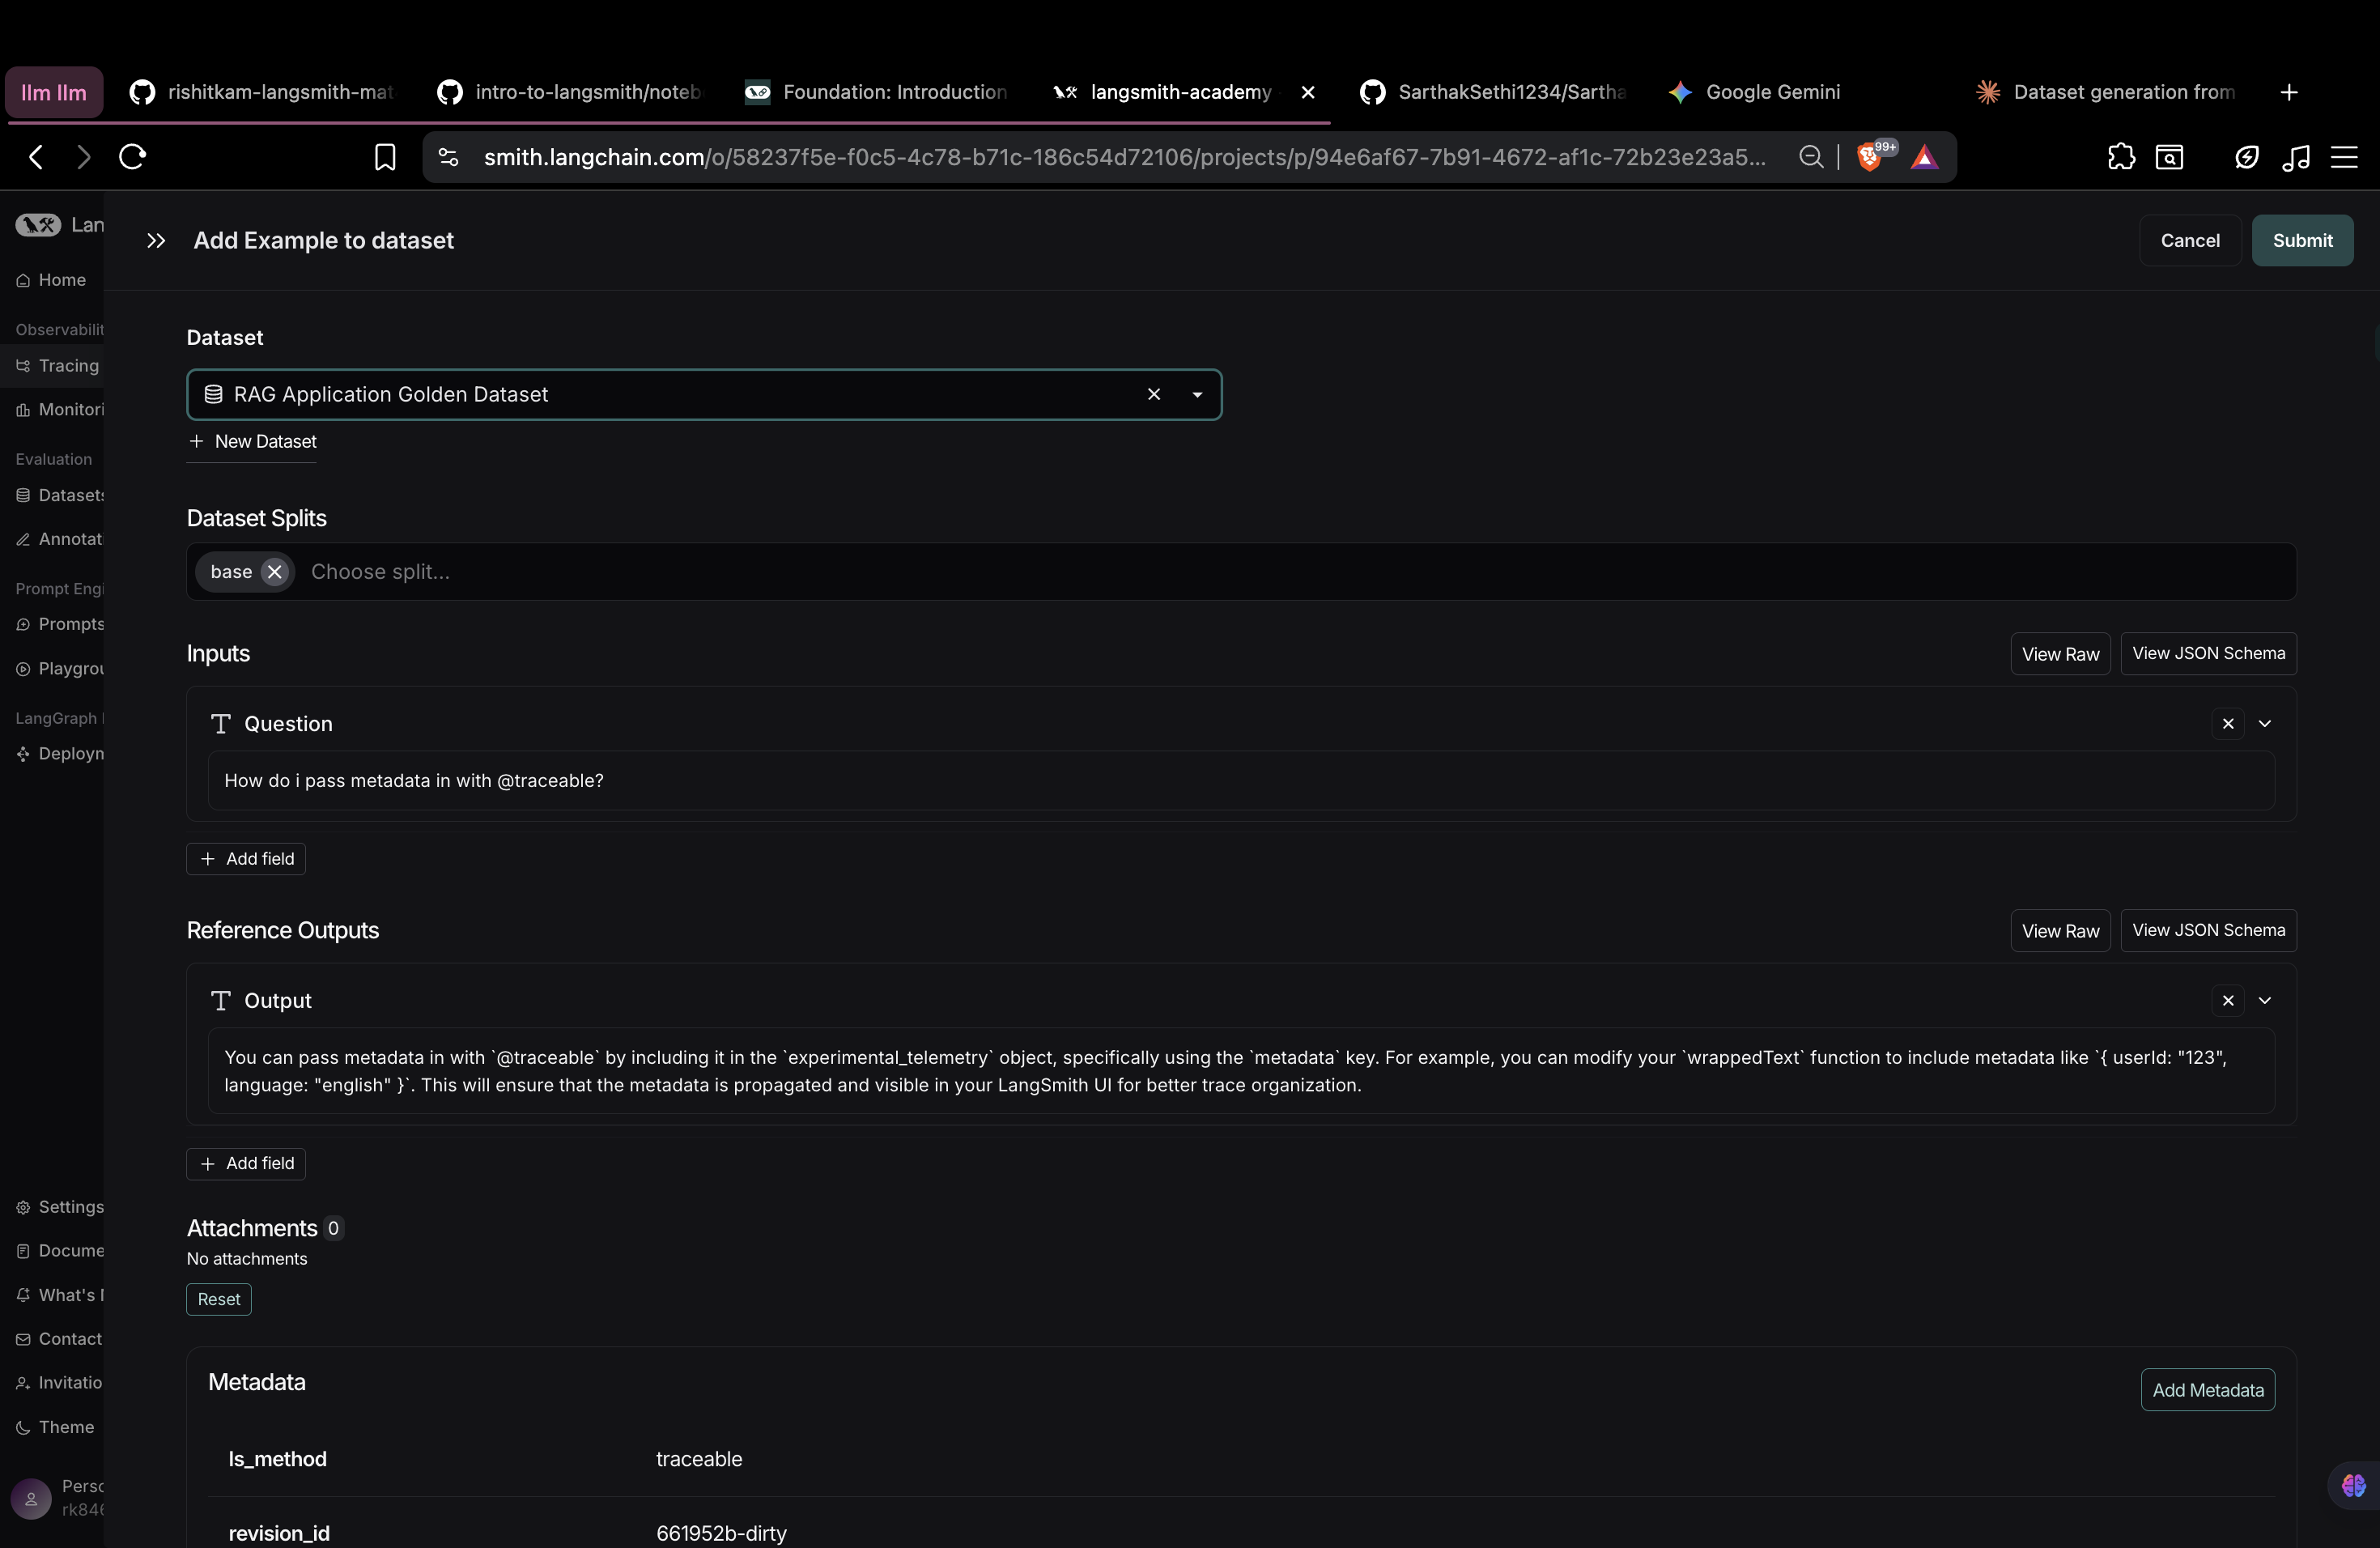

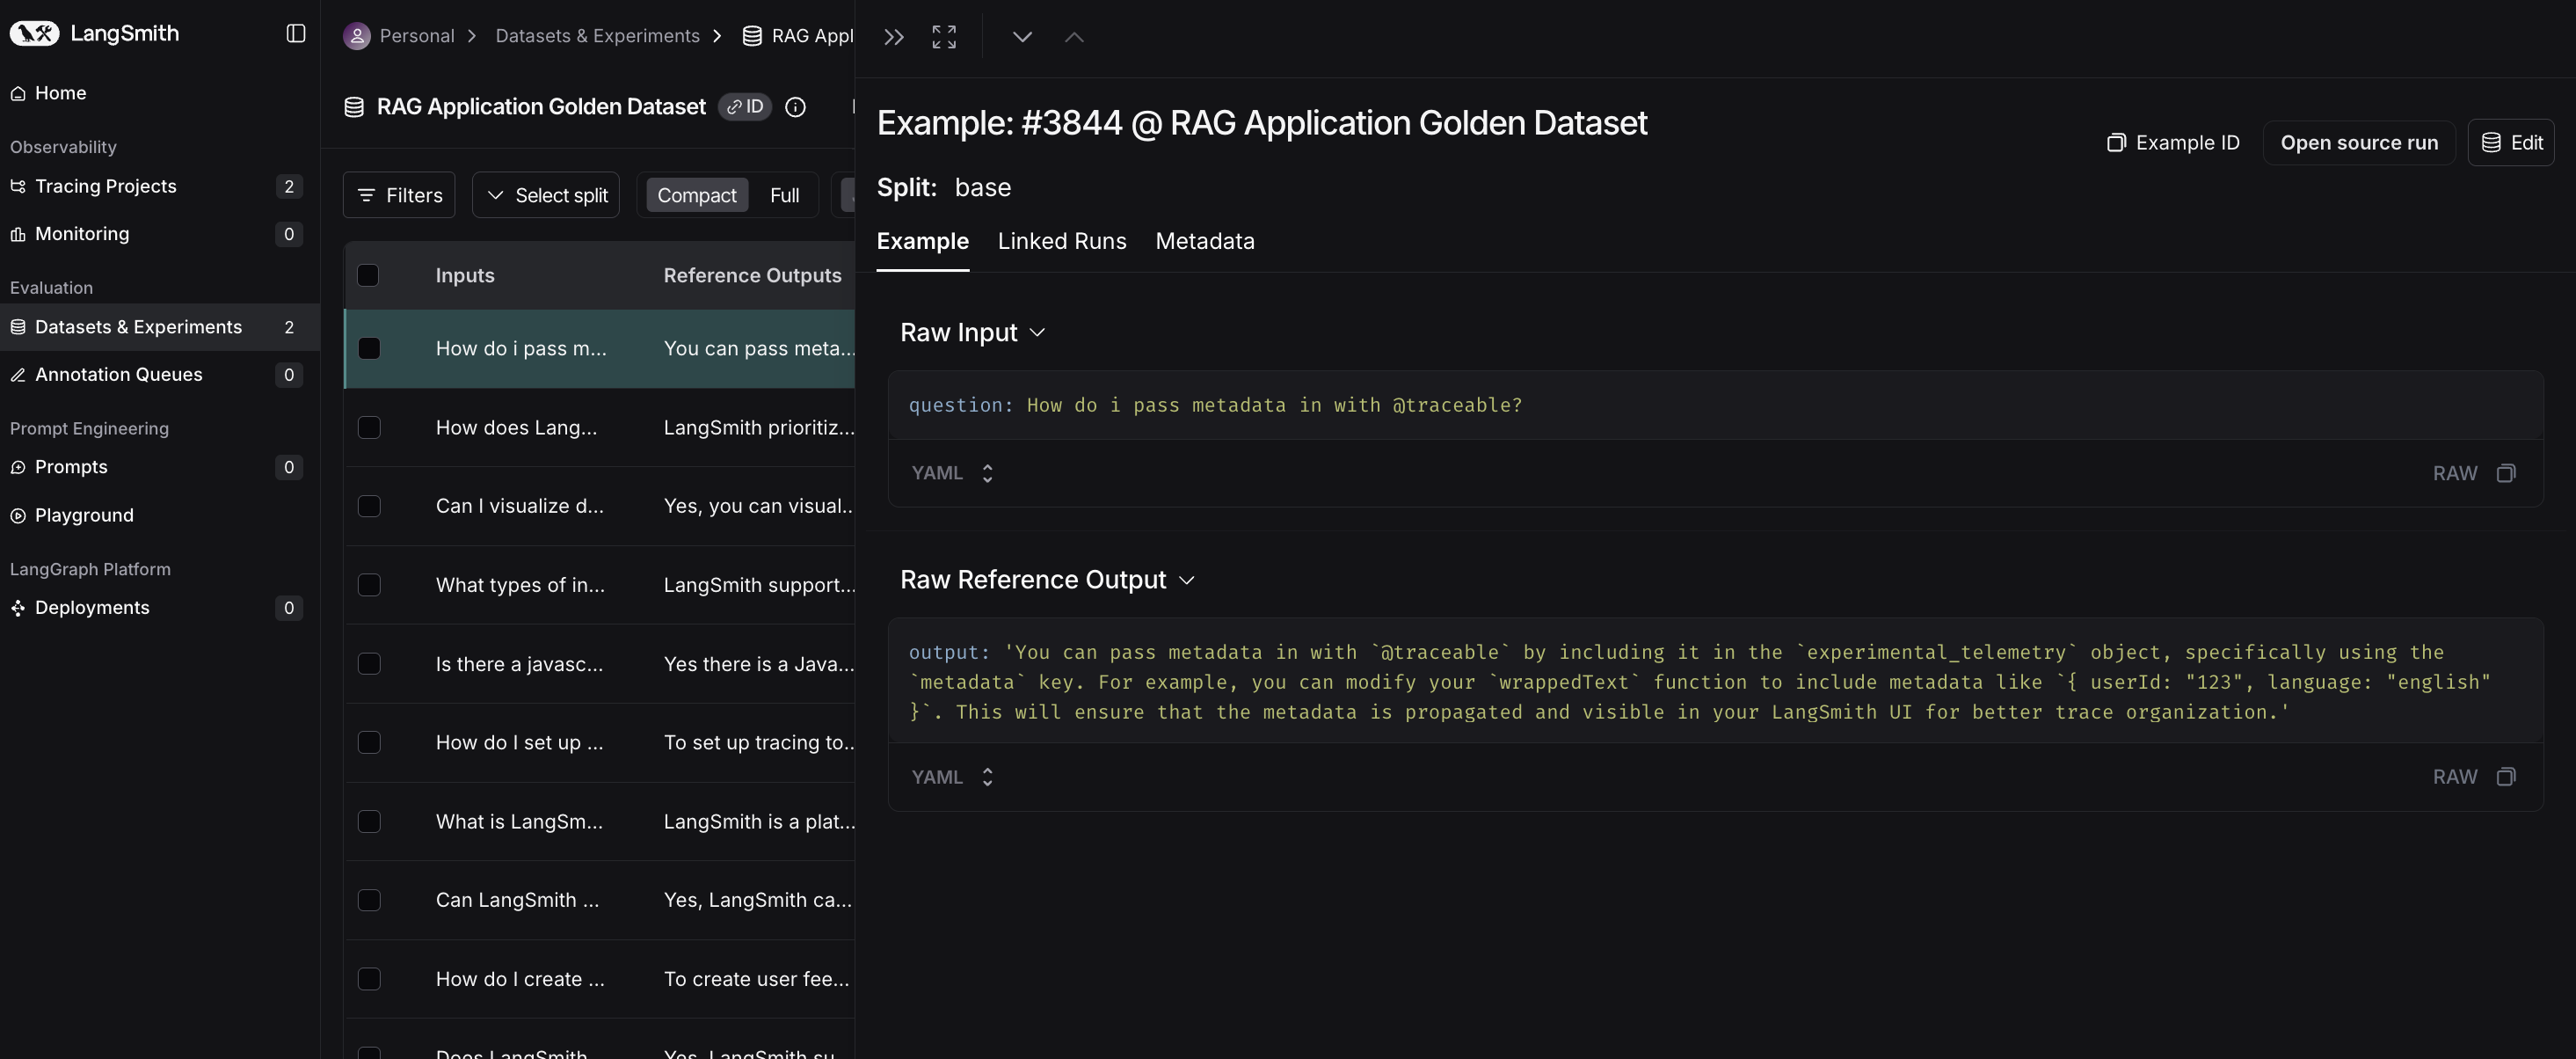


### We can see that our trace was added to the dataset by following the steps as shown in the image.

In [14]:
question = "what is the work of dataset in LangSmith?"
langsmith_rag(question)

'In LangSmith, datasets are used for managing and evaluating data related to language models. This includes operations such as versioning datasets to track changes, filtering and splitting datasets for targeted evaluations, and sharing or exporting datasets in various formats. The purpose is to streamline the observability and evaluation of language models.'

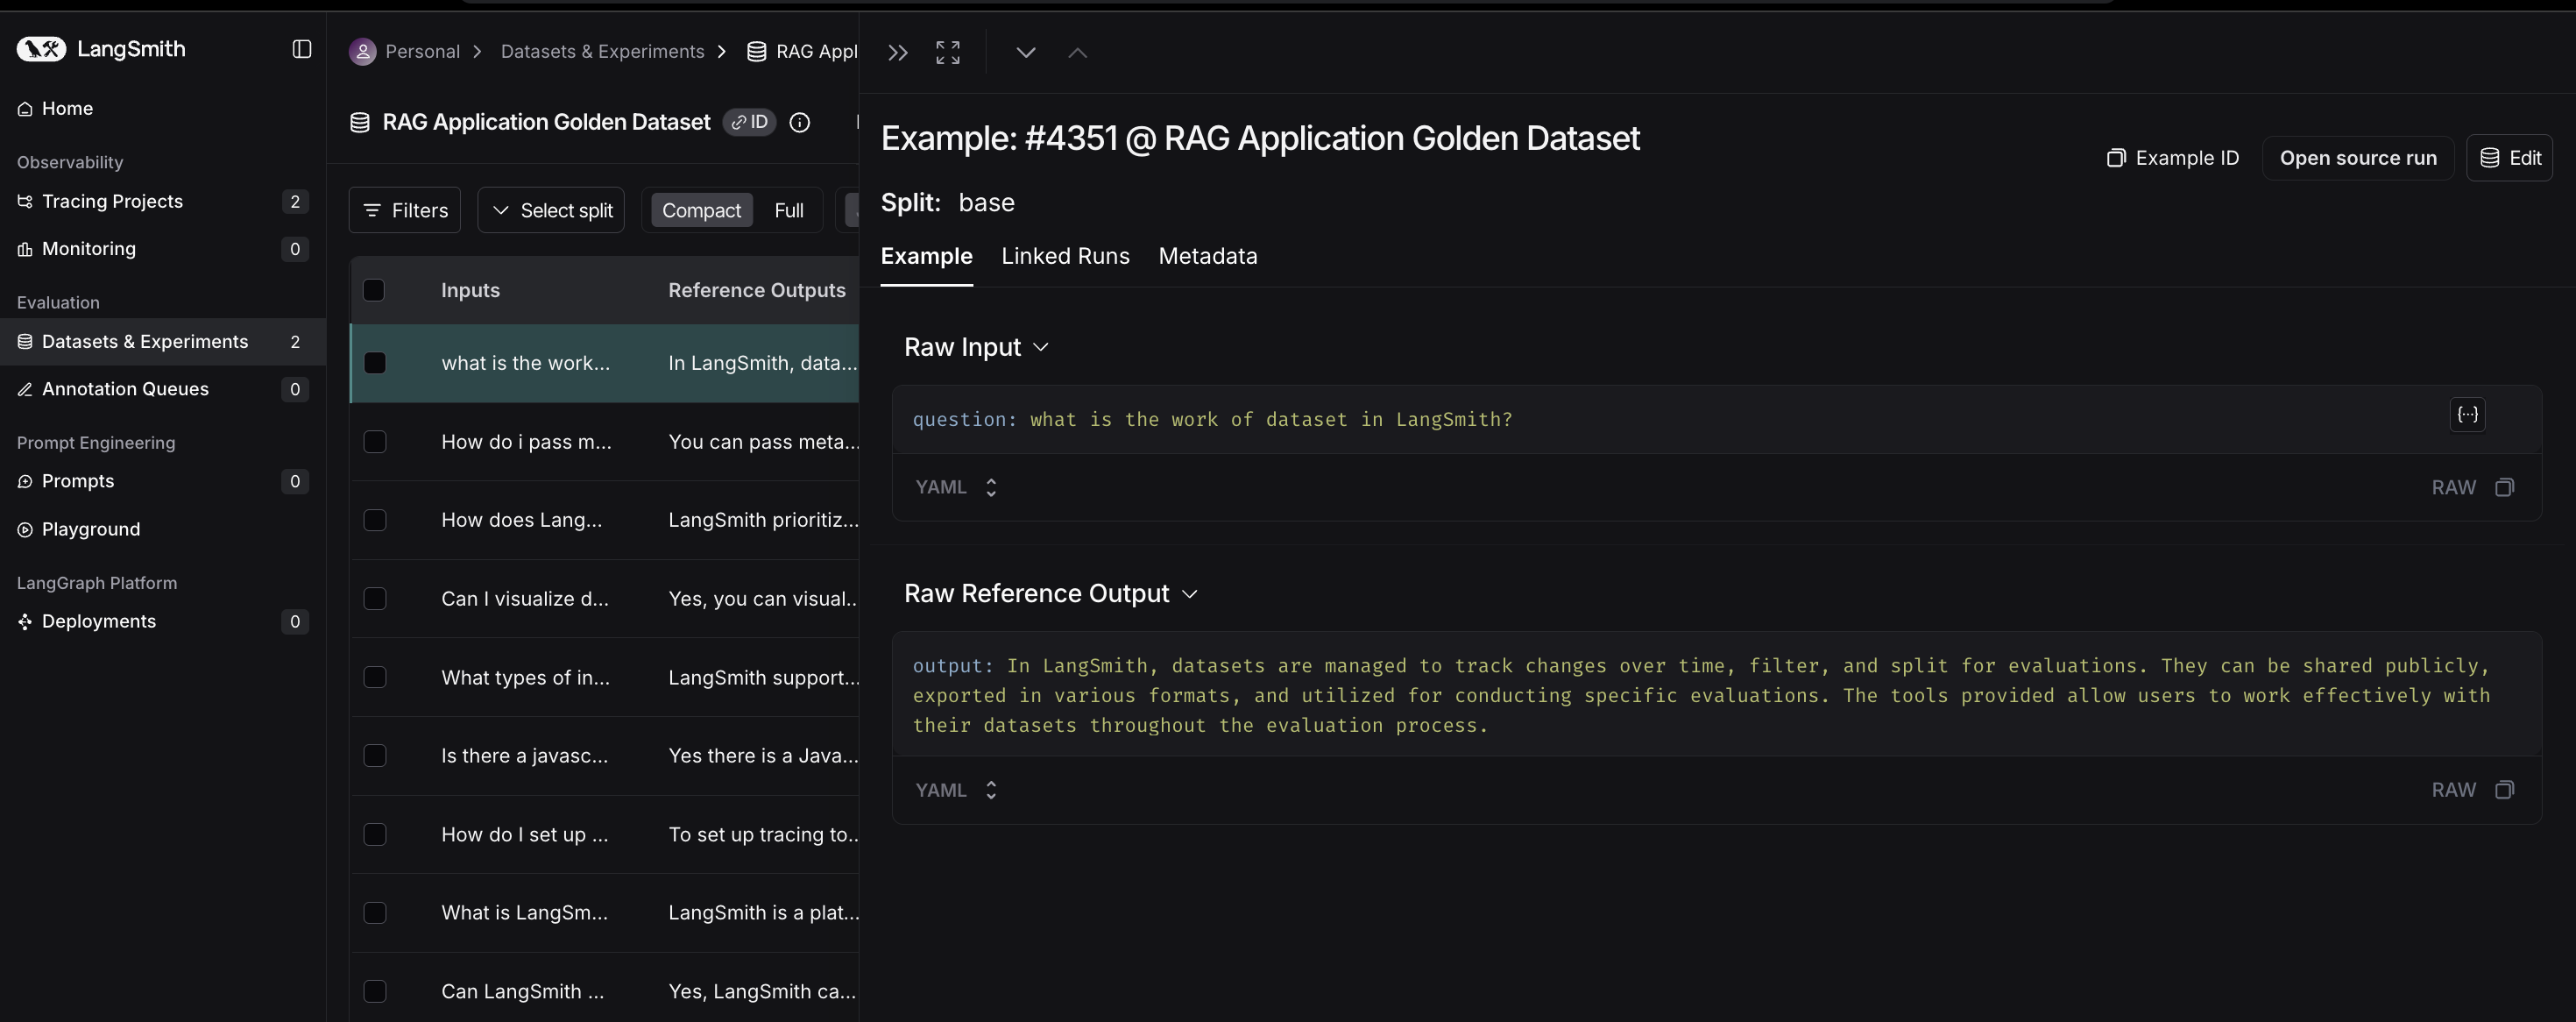


This trace was also added as an example

### I also added tags to the dataset to keep track of all its versions




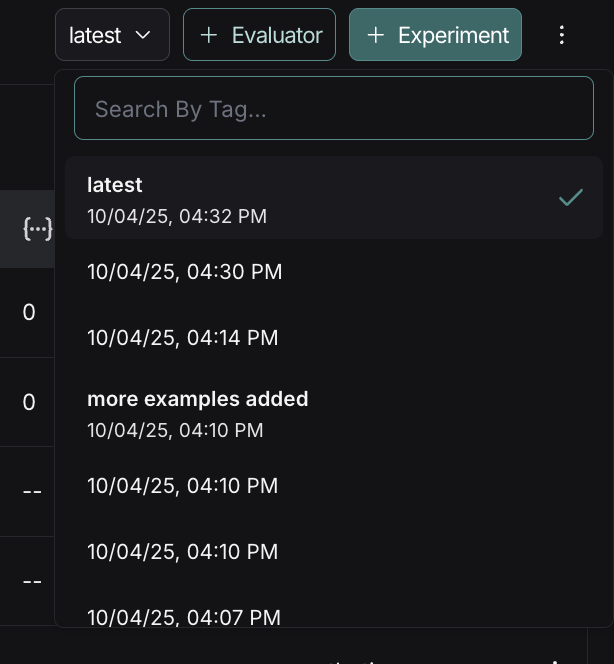

### Added a split in the dataset 


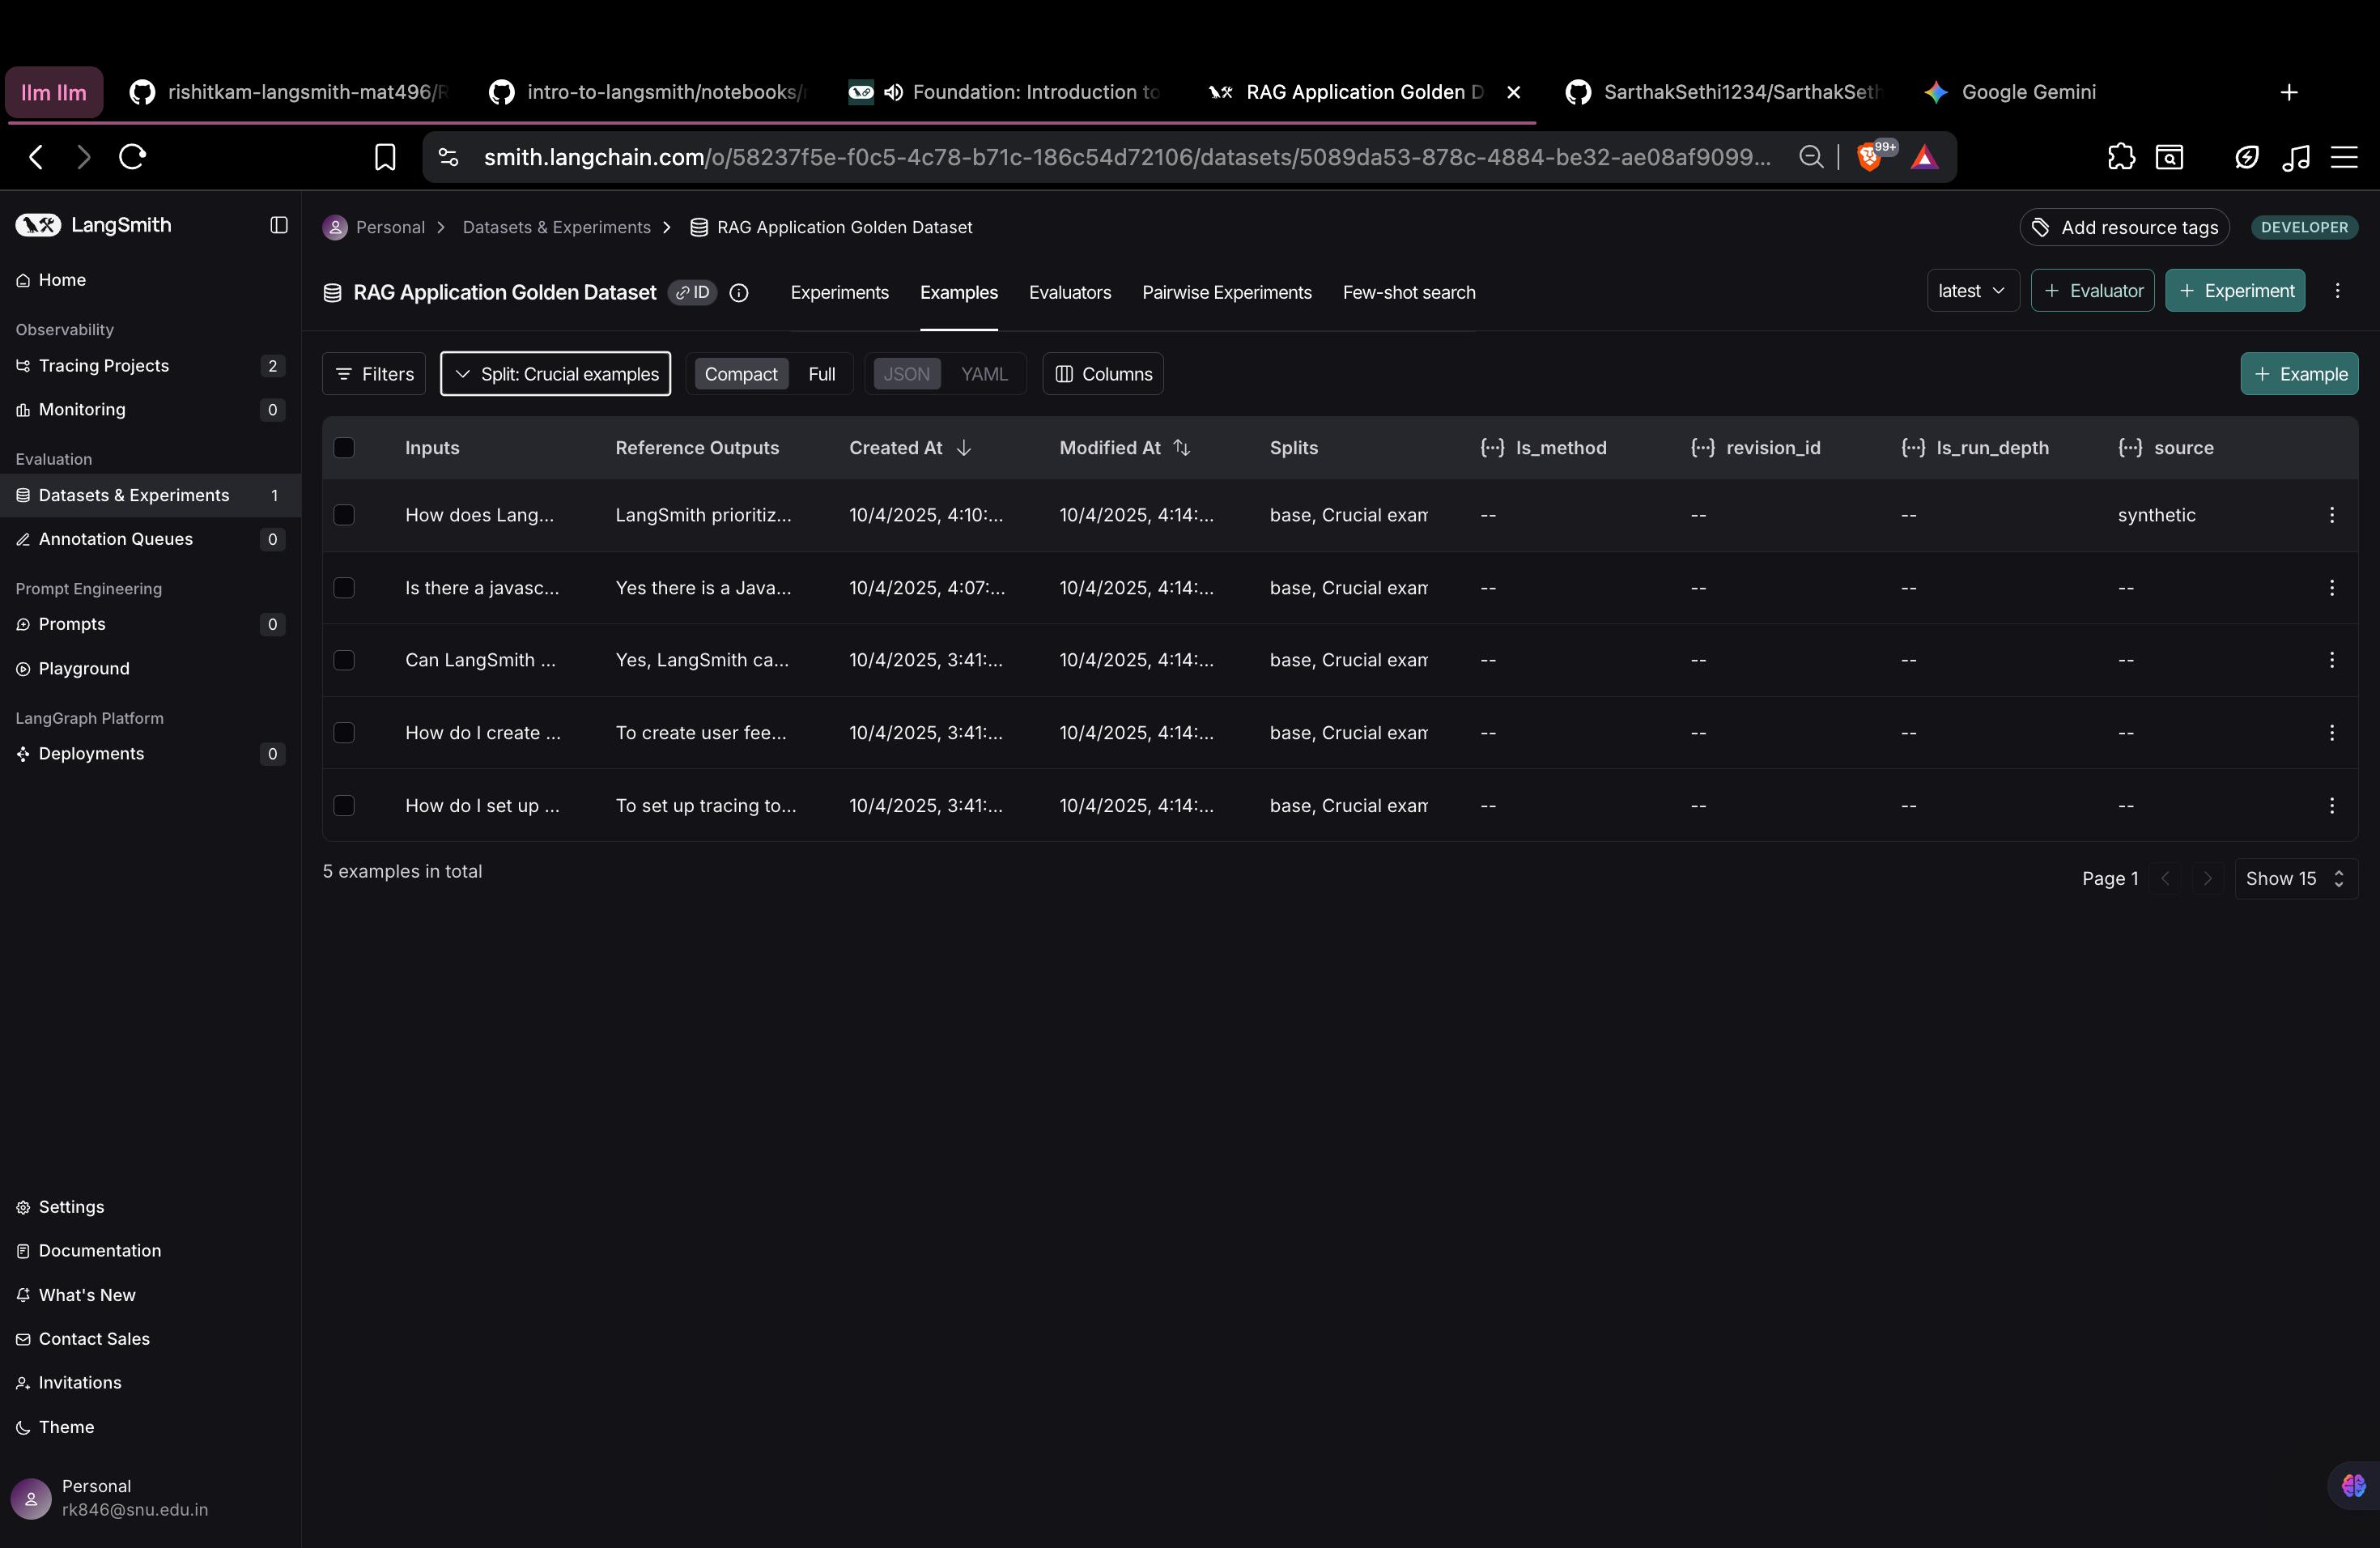

### I also edited the dataset to put in the input and output schema :


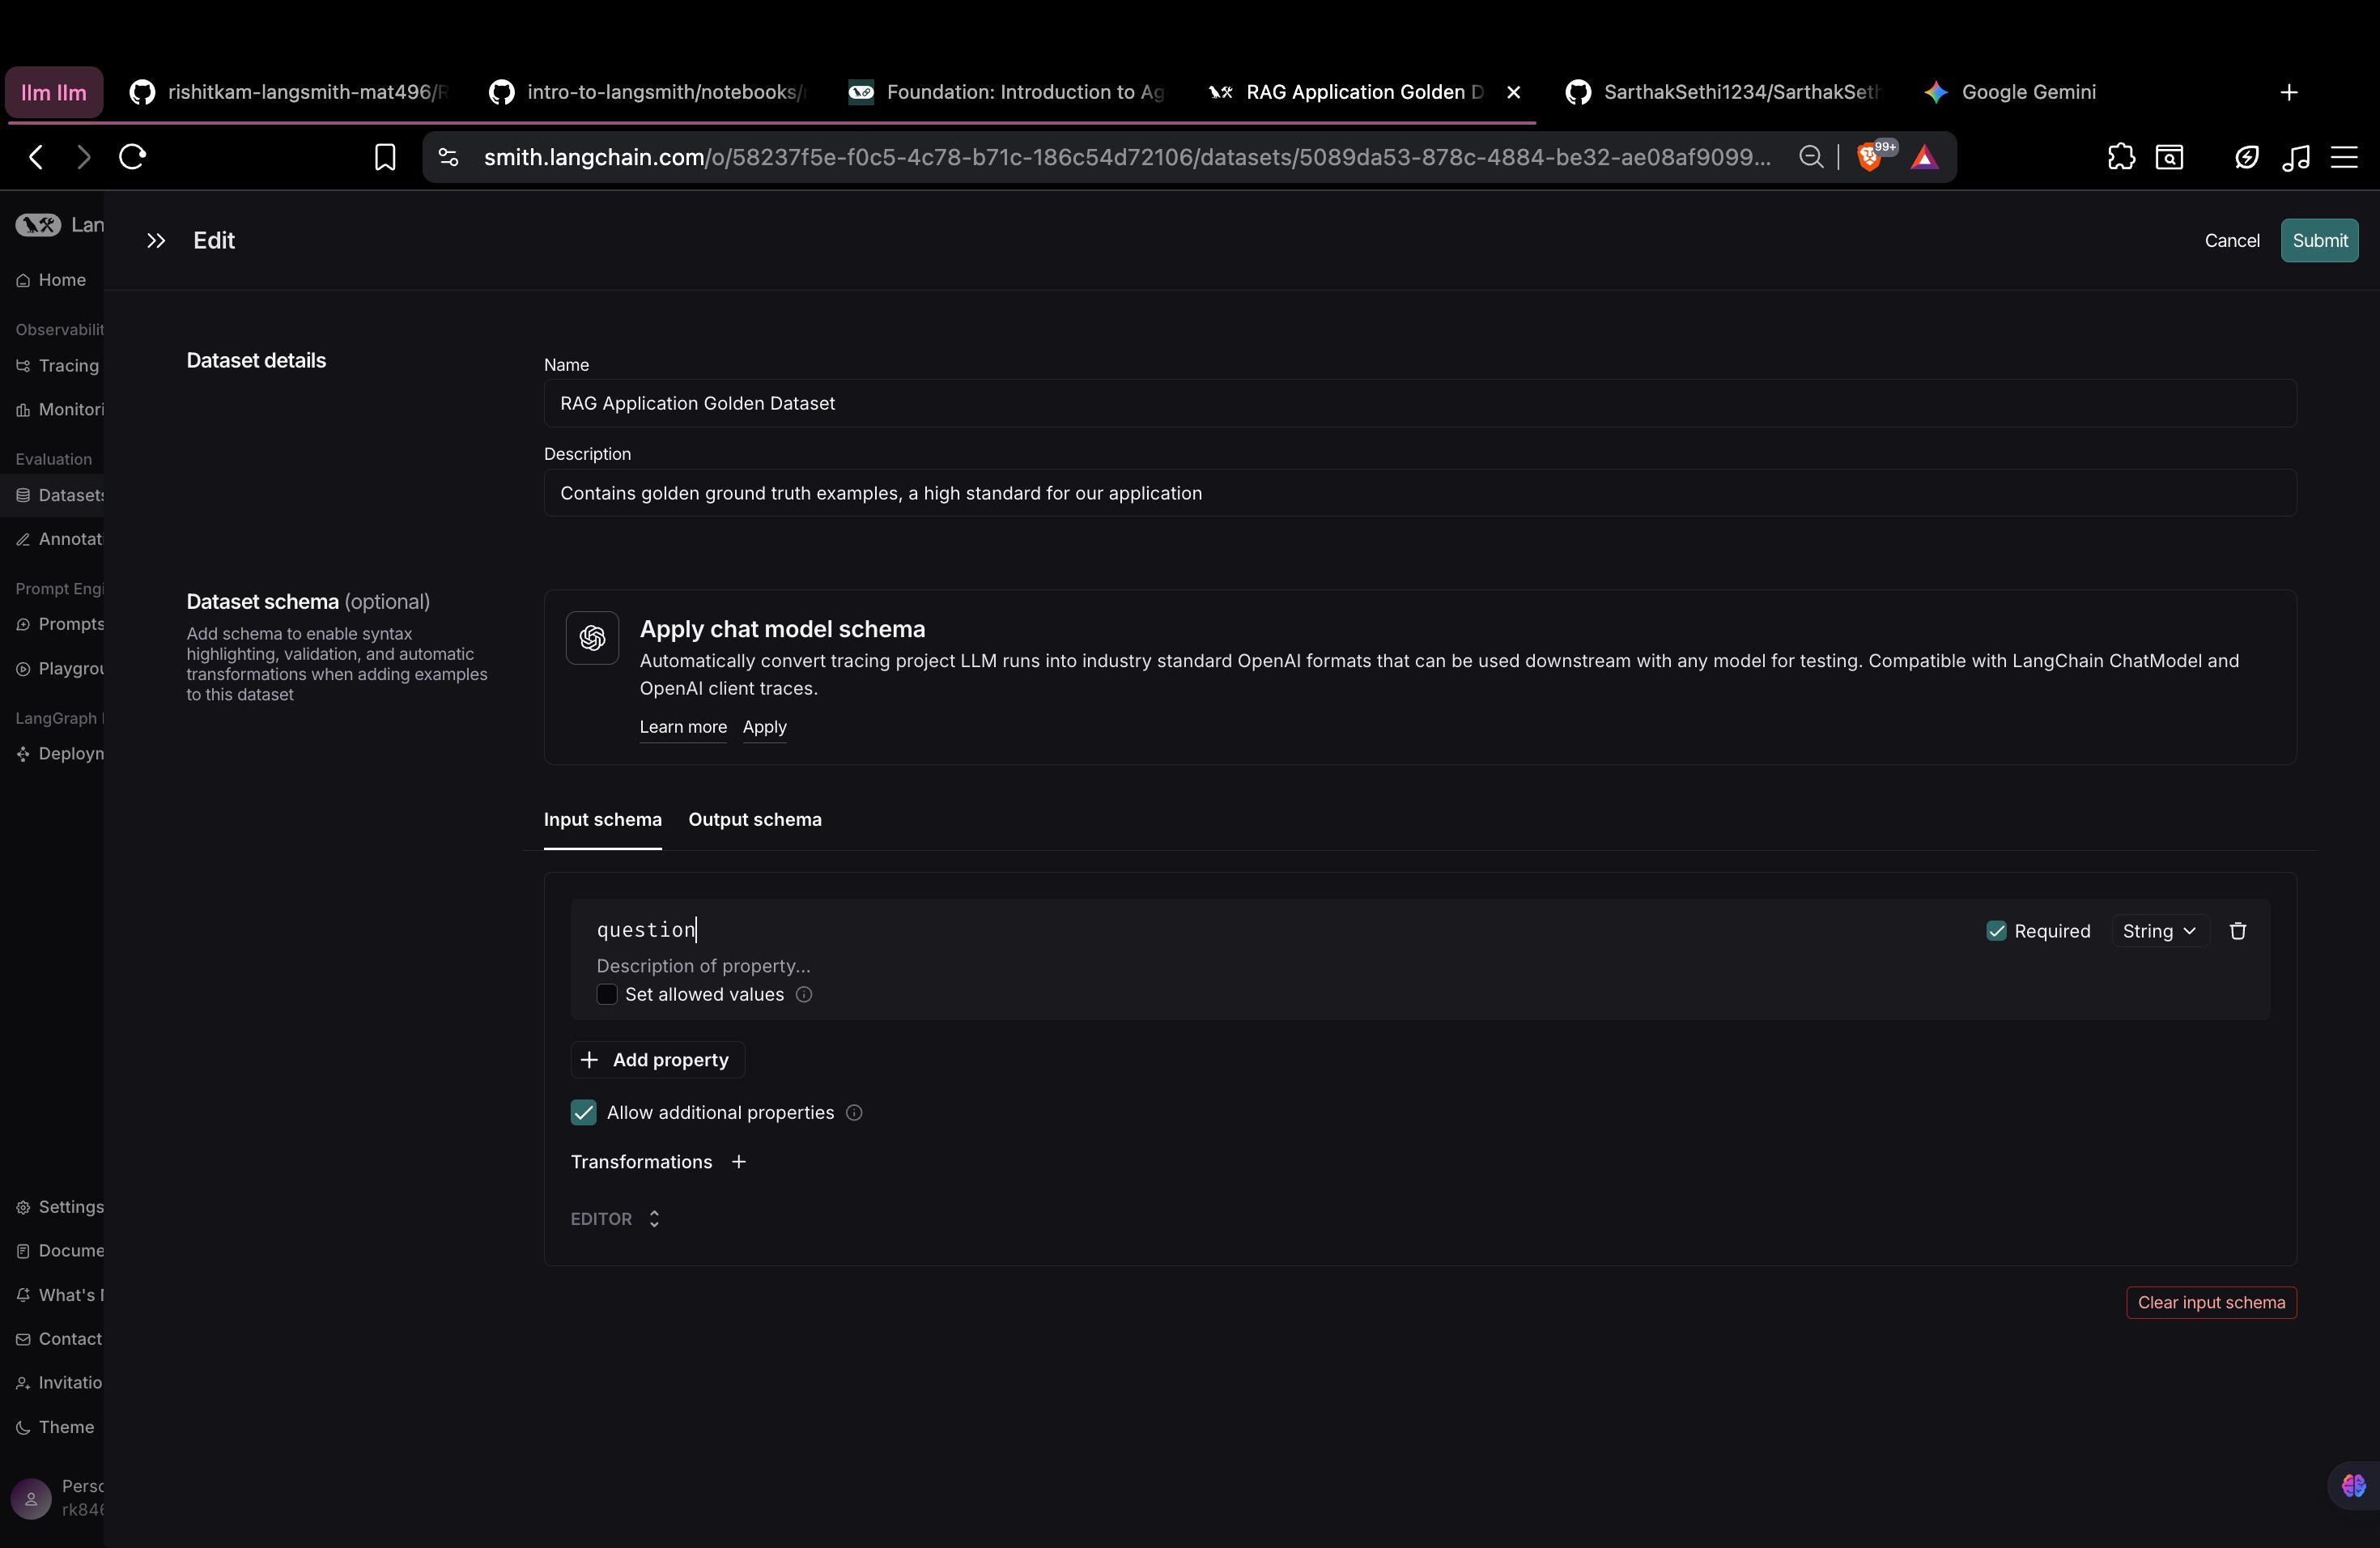

### I AI generated some examples in the Dataset : 


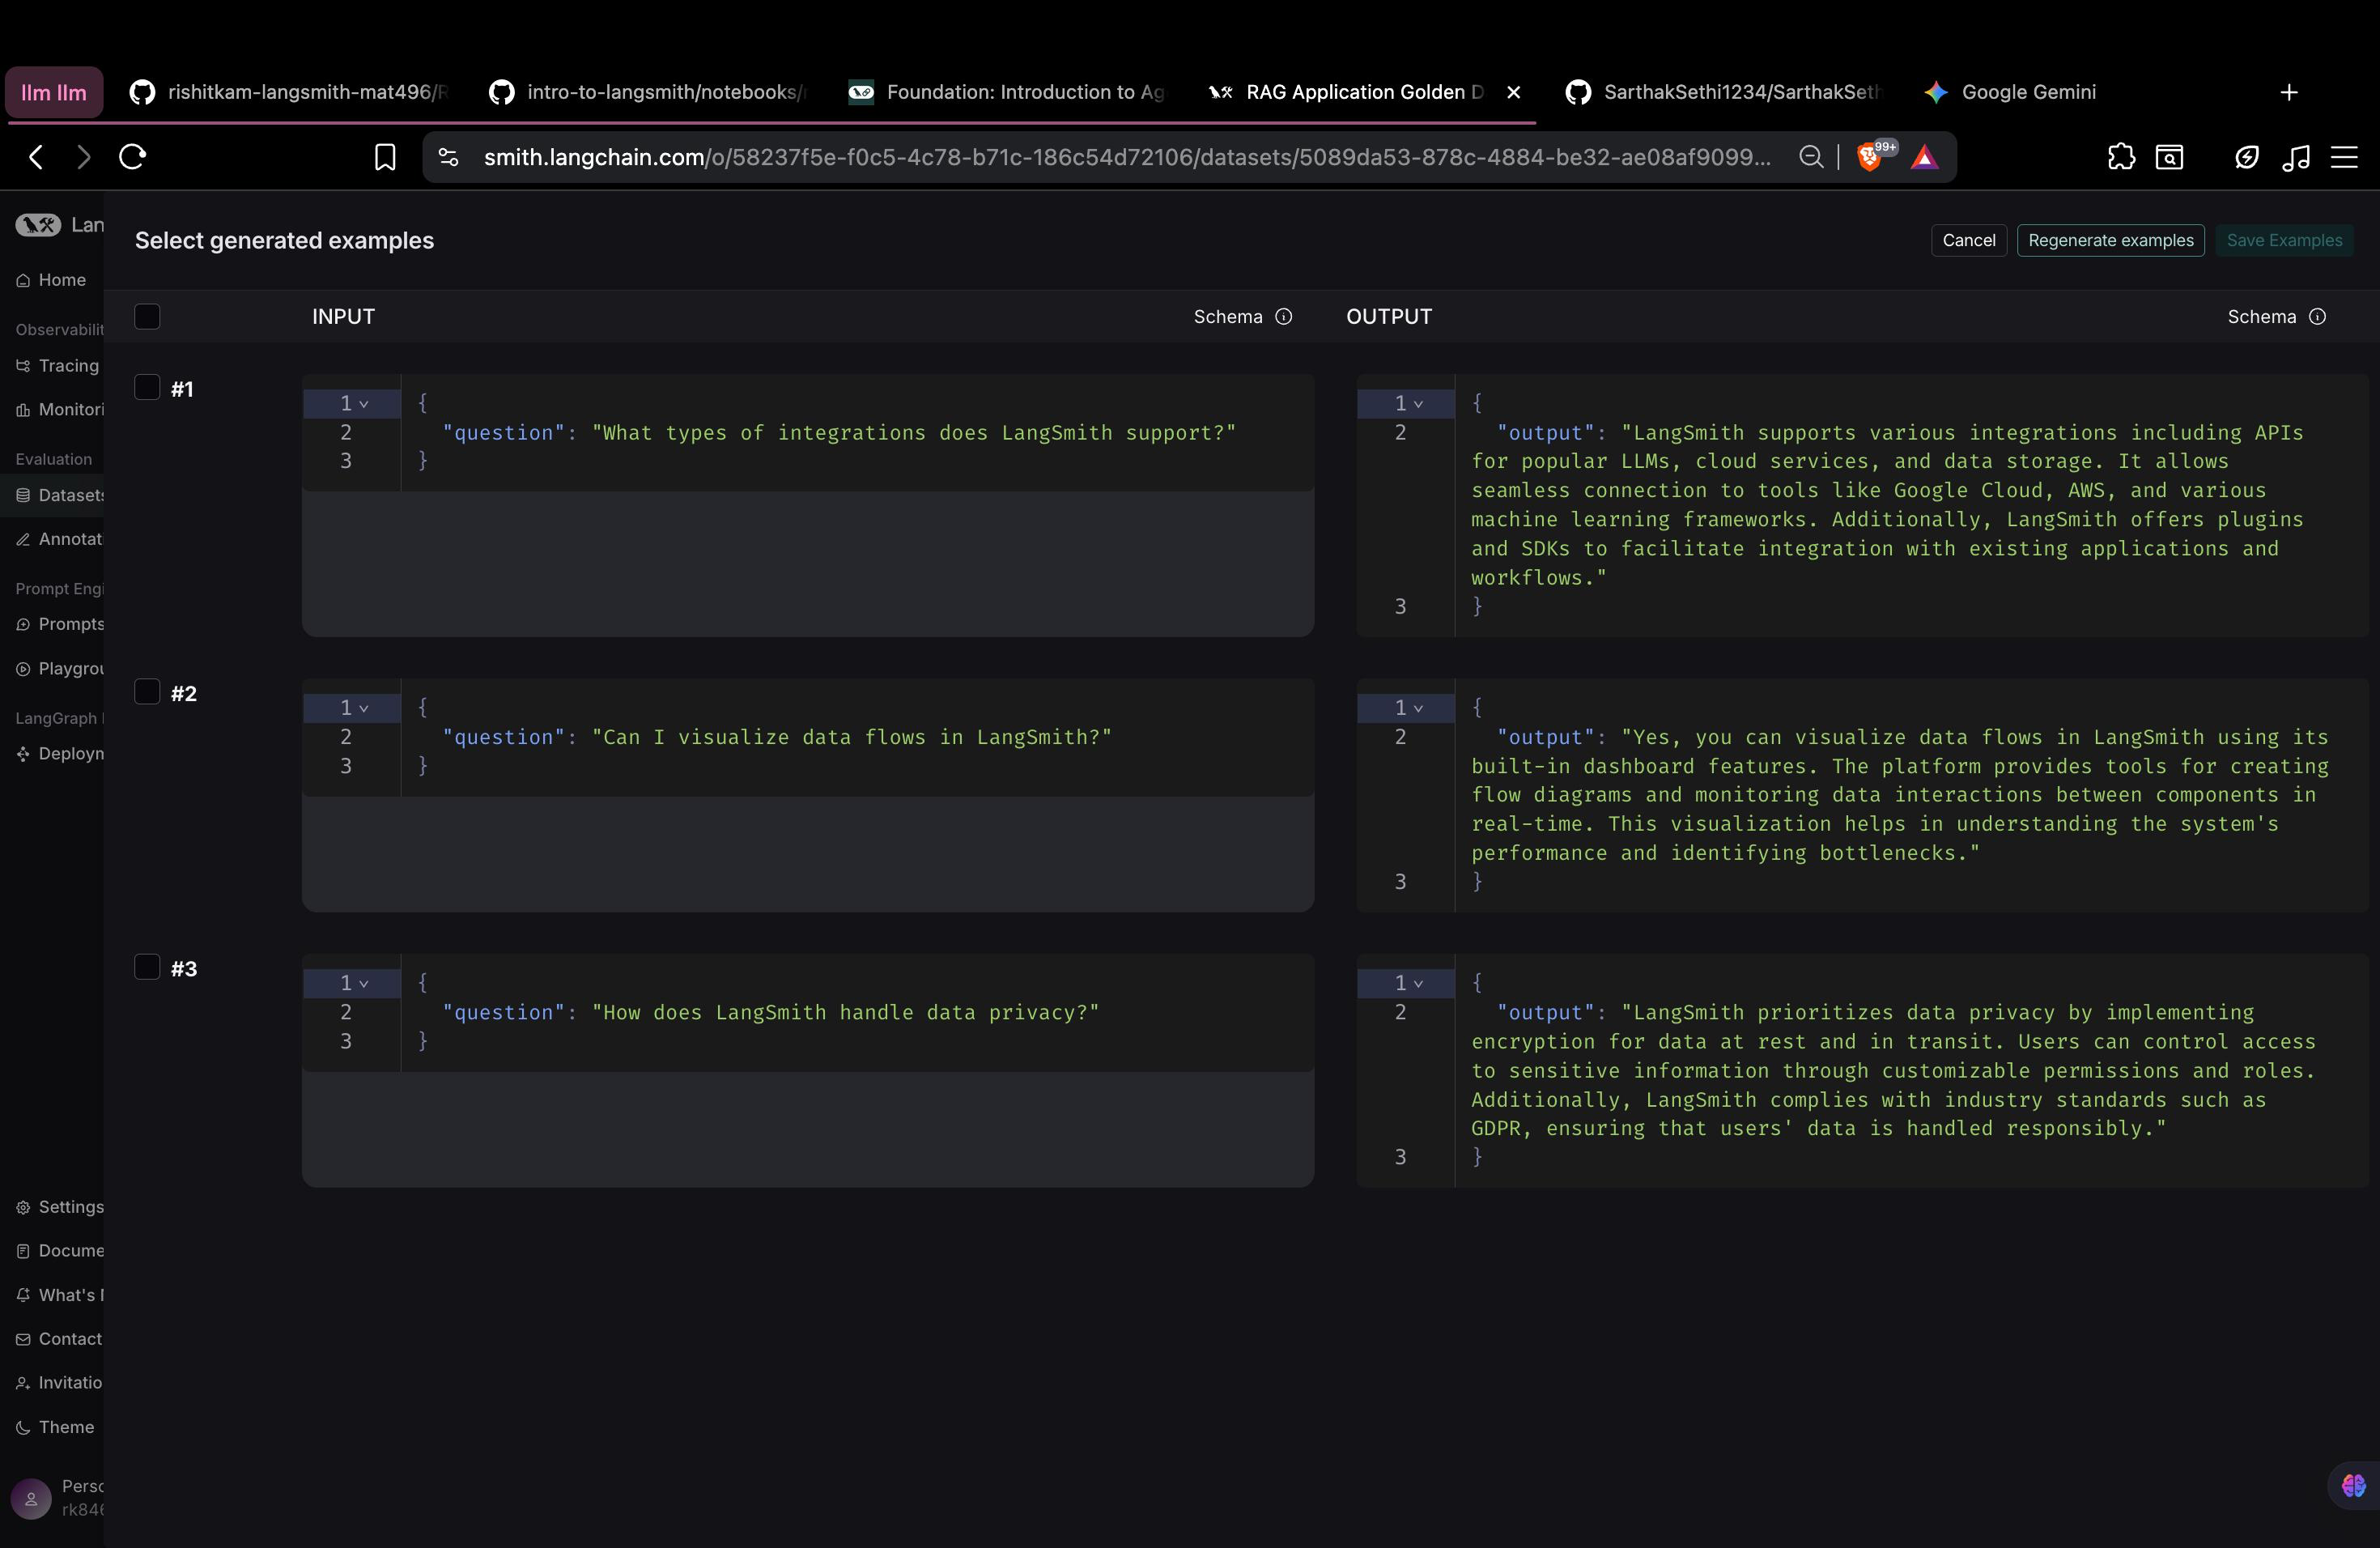


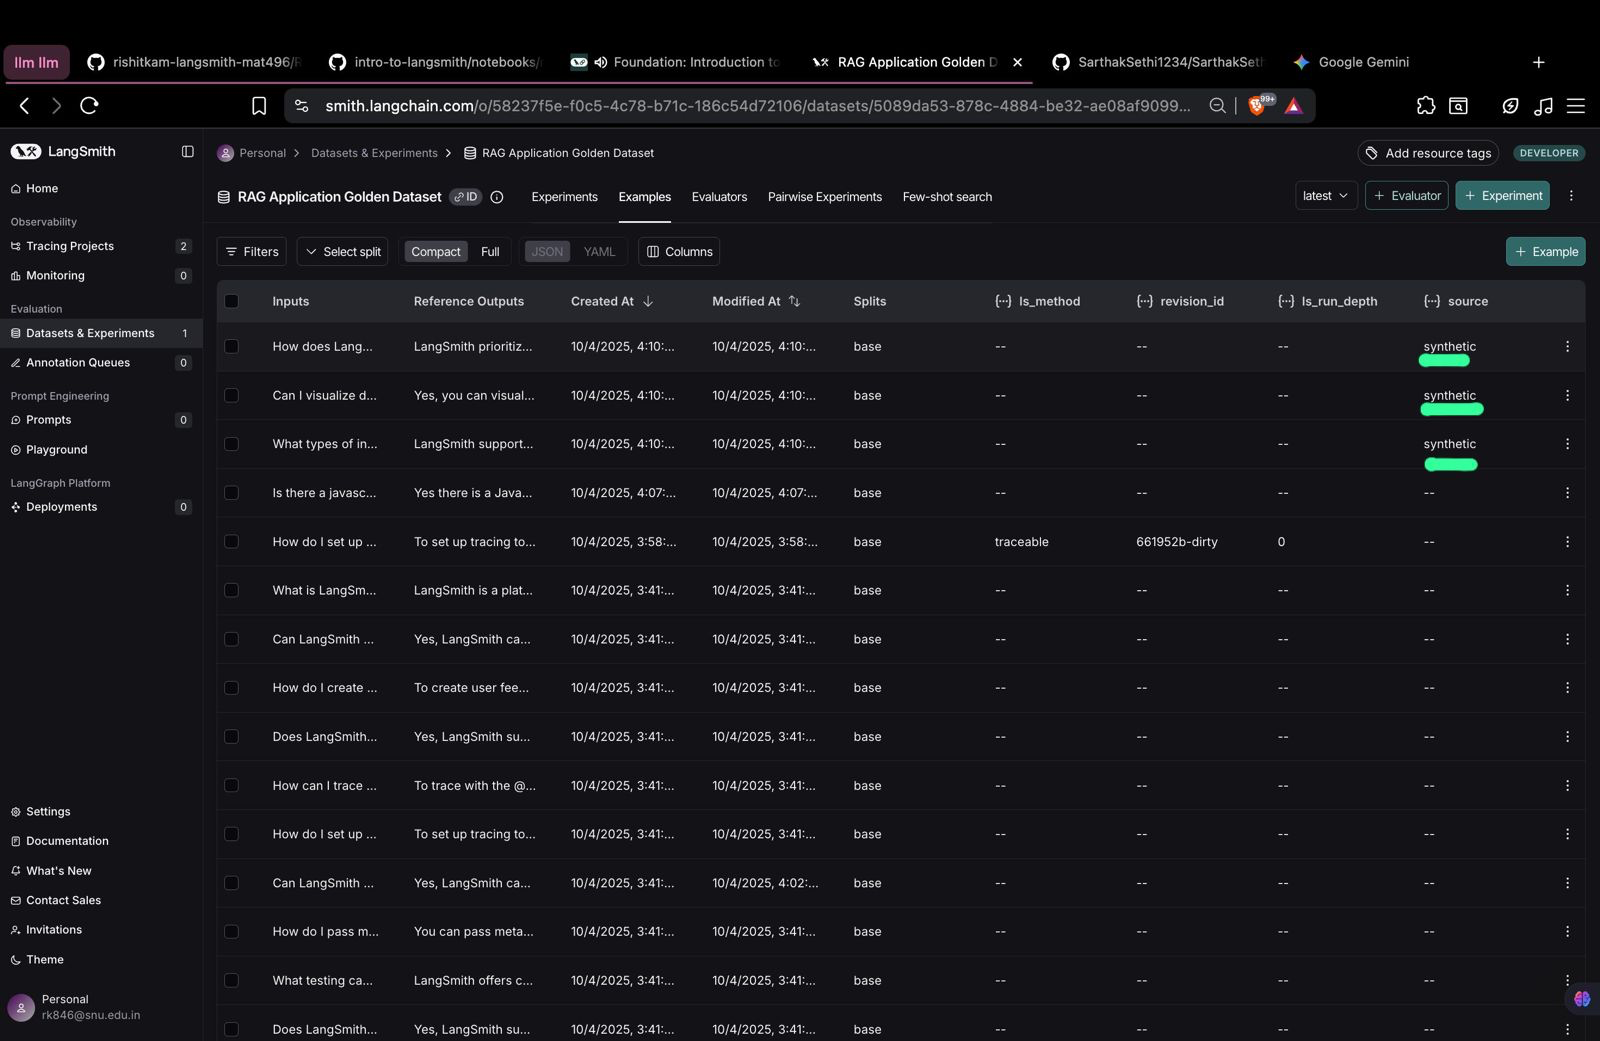



### AI generated examples have source listed as 'synthetic'

# Wrote a code to populate a new dataset of my own

In [15]:
from langsmith import Client

example_inputs = [
("What is the meaning of life?", "The meaning of life is a fundamental philosophical question with various perspectives: existentialists argue we create our own meaning through choices and actions, while religious traditions often point to divine purpose. Many philosophers suggest meaning emerges from relationships, personal growth, and contributing to something beyond ourselves."),
("Is free will an illusion?", "The free will debate divides philosophers into compatibilists who believe free will and determinism can coexist, hard determinists who argue all actions are predetermined by prior causes, and libertarians who maintain we have genuine agency. Neuroscience adds complexity by showing unconscious processes precede conscious decisions."),
("What is consciousness?", "Consciousness remains one of philosophy's hard problems. It refers to subjective experience—what it's like to perceive, feel, and think. Theories range from dualism (mind separate from body) to physicalism (consciousness emerges from brain processes) to panpsychism (consciousness is fundamental to matter itself)."),
("Can we ever truly know reality?", "This epistemological question divides realists who believe we can access objective reality from skeptics who doubt certainty. Kant argued we only know reality as it appears to us, filtered through our mental categories. Modern perspectives consider how language, culture, and perception shape our understanding of what's real."),
("What makes an action morally right?", "Different ethical frameworks offer competing answers: consequentialism judges actions by outcomes (particularly utilitarianism's greatest good), deontology emphasizes duties and rules regardless of consequences, and virtue ethics focuses on character and human flourishing. Each framework provides distinct guidance for moral decision-making."),
("Is there an objective truth?", "Objectivists maintain truth exists independently of beliefs, while relativists argue truth varies by perspective, culture, or framework. Pragmatists like William James suggest truth is what works in practice. Most contemporary philosophers accept objective truths in science while acknowledging interpretation plays a role in meaning and value."),
("What is the nature of personal identity?", "Personal identity theories address what makes you the same person over time. Psychological continuity theories emphasize memory and consciousness, while bodily continuity theories focus on physical persistence. The Ship of Theseus paradox illustrates the complexity: if all parts change, does identity remain?"),
("Does God exist?", "Classical arguments for God's existence include the cosmological argument (first cause), teleological argument (design), and ontological argument (necessary being). Counterarguments cite the problem of evil, lack of empirical evidence, and alternative explanations. Agnosticism suggests the question may be unanswerable given our epistemic limitations."),
("What is justice?", "Justice theories span from Plato's harmony and proper roles to Rawls' fairness and veil of ignorance thought experiment. Distributive justice concerns fair allocation of resources, retributive justice addresses punishment, and procedural justice emphasizes fair processes. Different societies and traditions prioritize these aspects differently."),
("Is knowledge justified true belief?", "The traditional definition of knowledge as justified true belief was challenged by Gettier cases showing you can have justified true belief by luck. This sparked debates about whether knowledge requires additional conditions like causal connection, reliability, or immunity to defeat. Epistemologists continue refining what distinguishes knowledge from mere belief.")
]

client = Client()
# TODO: Fill in dataset name
dataset_id = "53be0cd4-34f9-453f-b4af-90dd9188017c"

# Prepare inputs and outputs for bulk creation
inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
    inputs=inputs,
    outputs=outputs,
    dataset_id=dataset_id,
)

{'example_ids': ['78b31e3c-7d35-4583-a123-43d311009fa4',
  '878ae5e4-43e5-4978-bb8c-5a135c268ab3',
  'cdbbdc85-94b0-486a-a385-71e23525cd32',
  'ccd7bc96-bbd3-4f5f-9ac4-4f68b26cd074',
  'c18c4cef-a74e-4cb3-9472-cdc87c7d2f76',
  '9cc250b2-8e12-443c-a97f-080feec0c80d',
  '117529de-2f47-4ea5-8f75-fc006c6875d8',
  '67eee66d-43e6-4e17-b3aa-a18f815db3d1',
  'b1bfbfb3-c13a-40e5-96a5-eec6b808ea2e',
  'ff329e5e-25ea-4906-a698-95aa680f61aa'],
 'count': 10}

I wrote the code to populate a new dataset named MAT_496_1

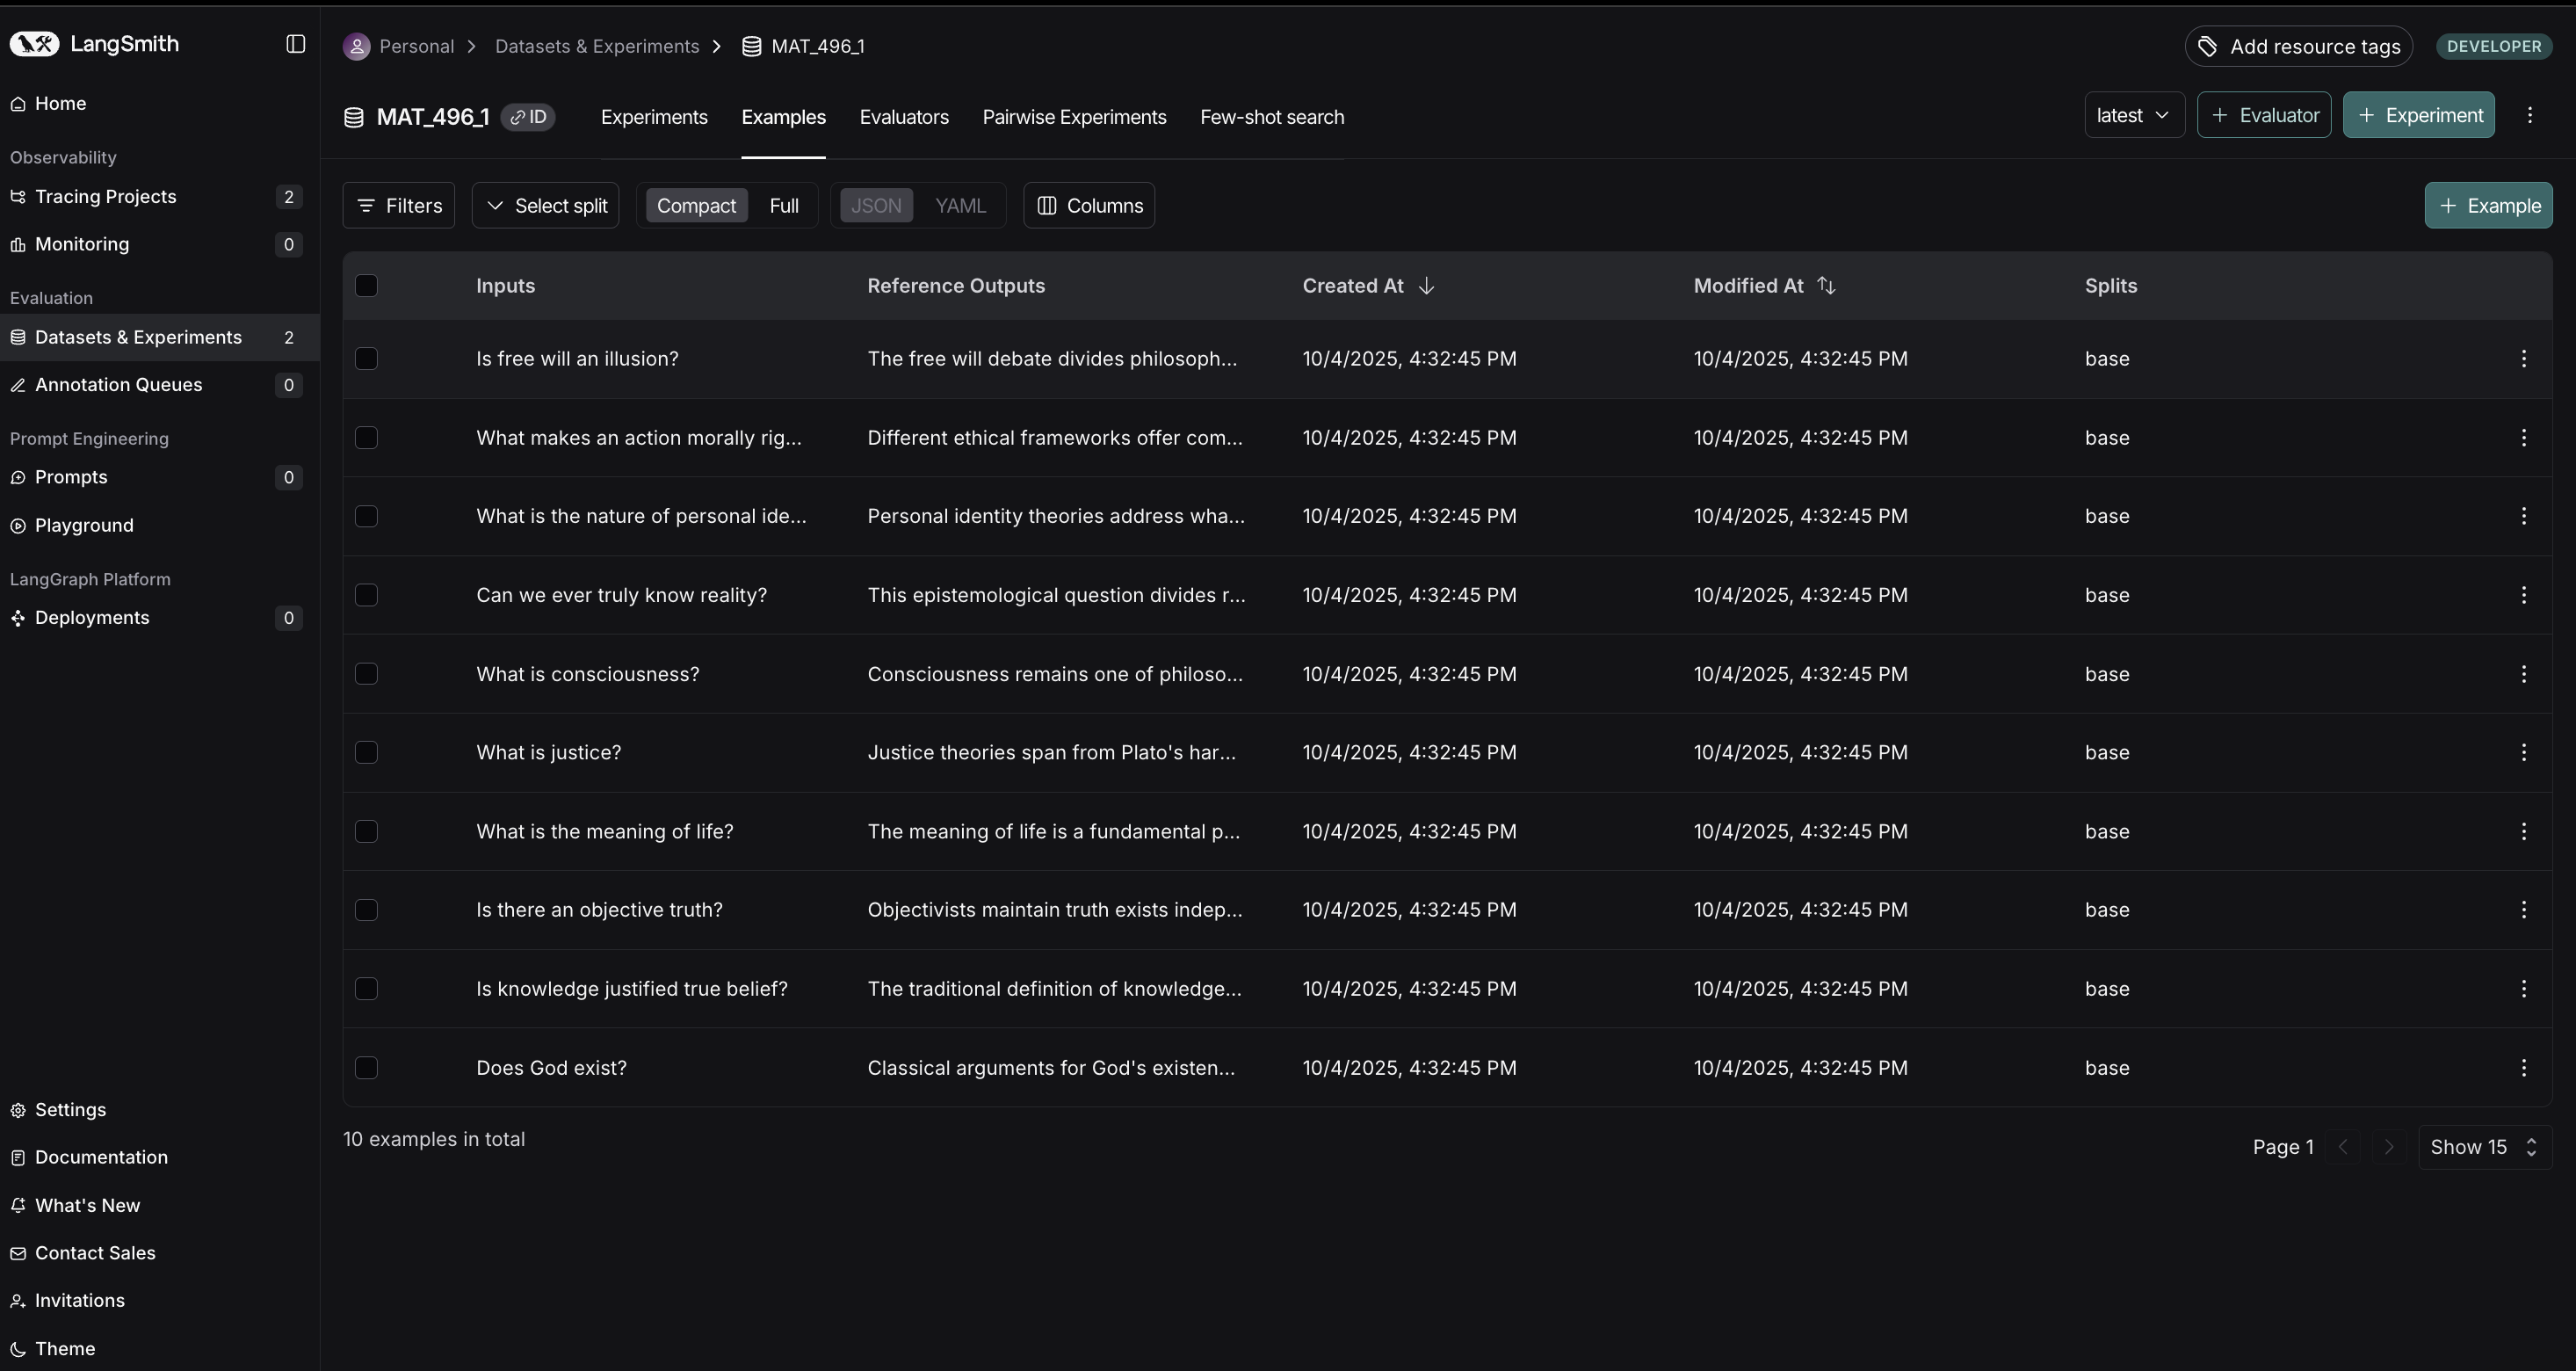

## I Created a new split in the MAT496 dataset called crucial examples : 

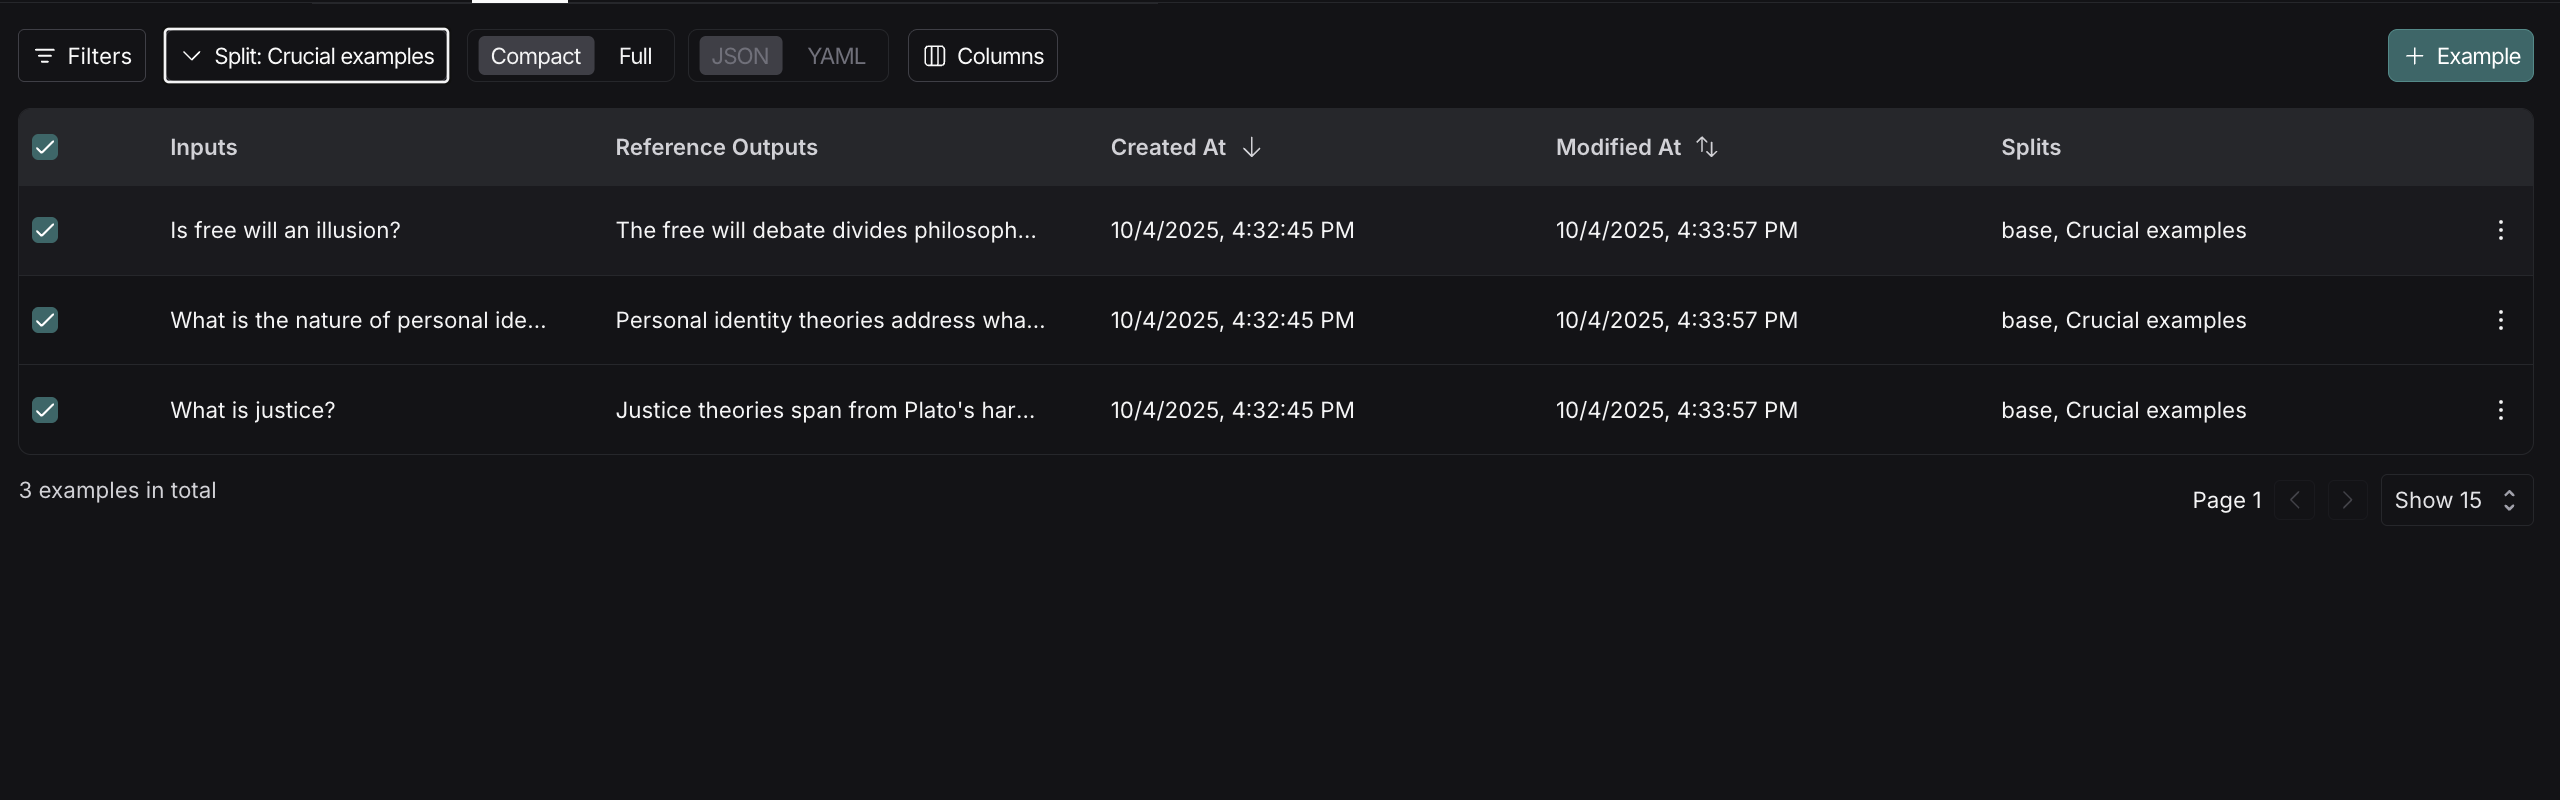




### we can use splits to test on an important sub dataset seperately

### added custom tags to this dataset
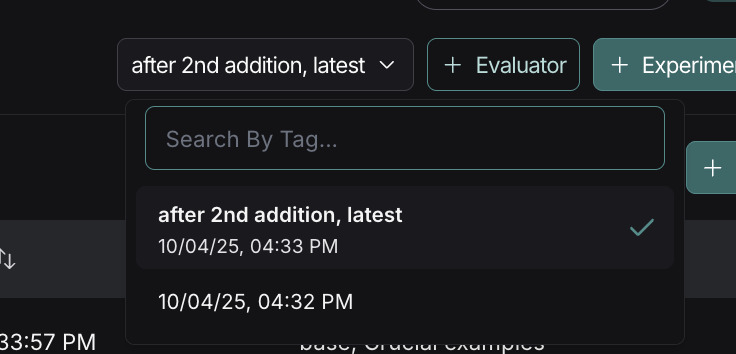

### Added Input and Output Schema : 


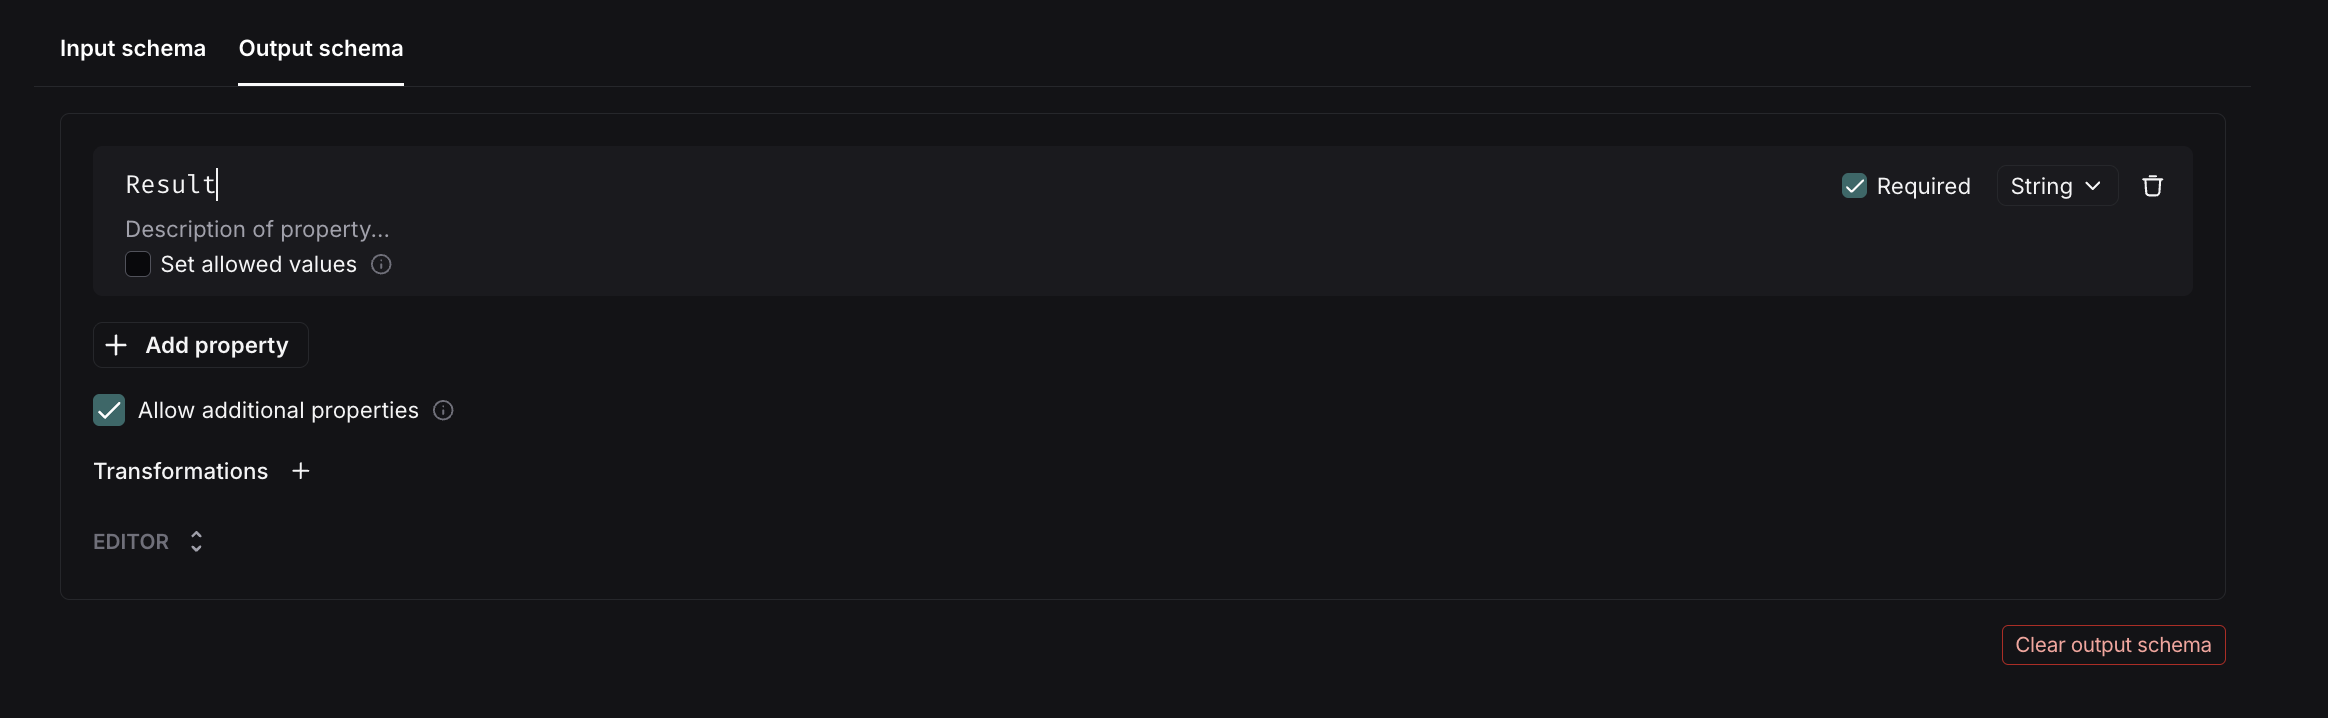

### Edited a pre-existing example : 
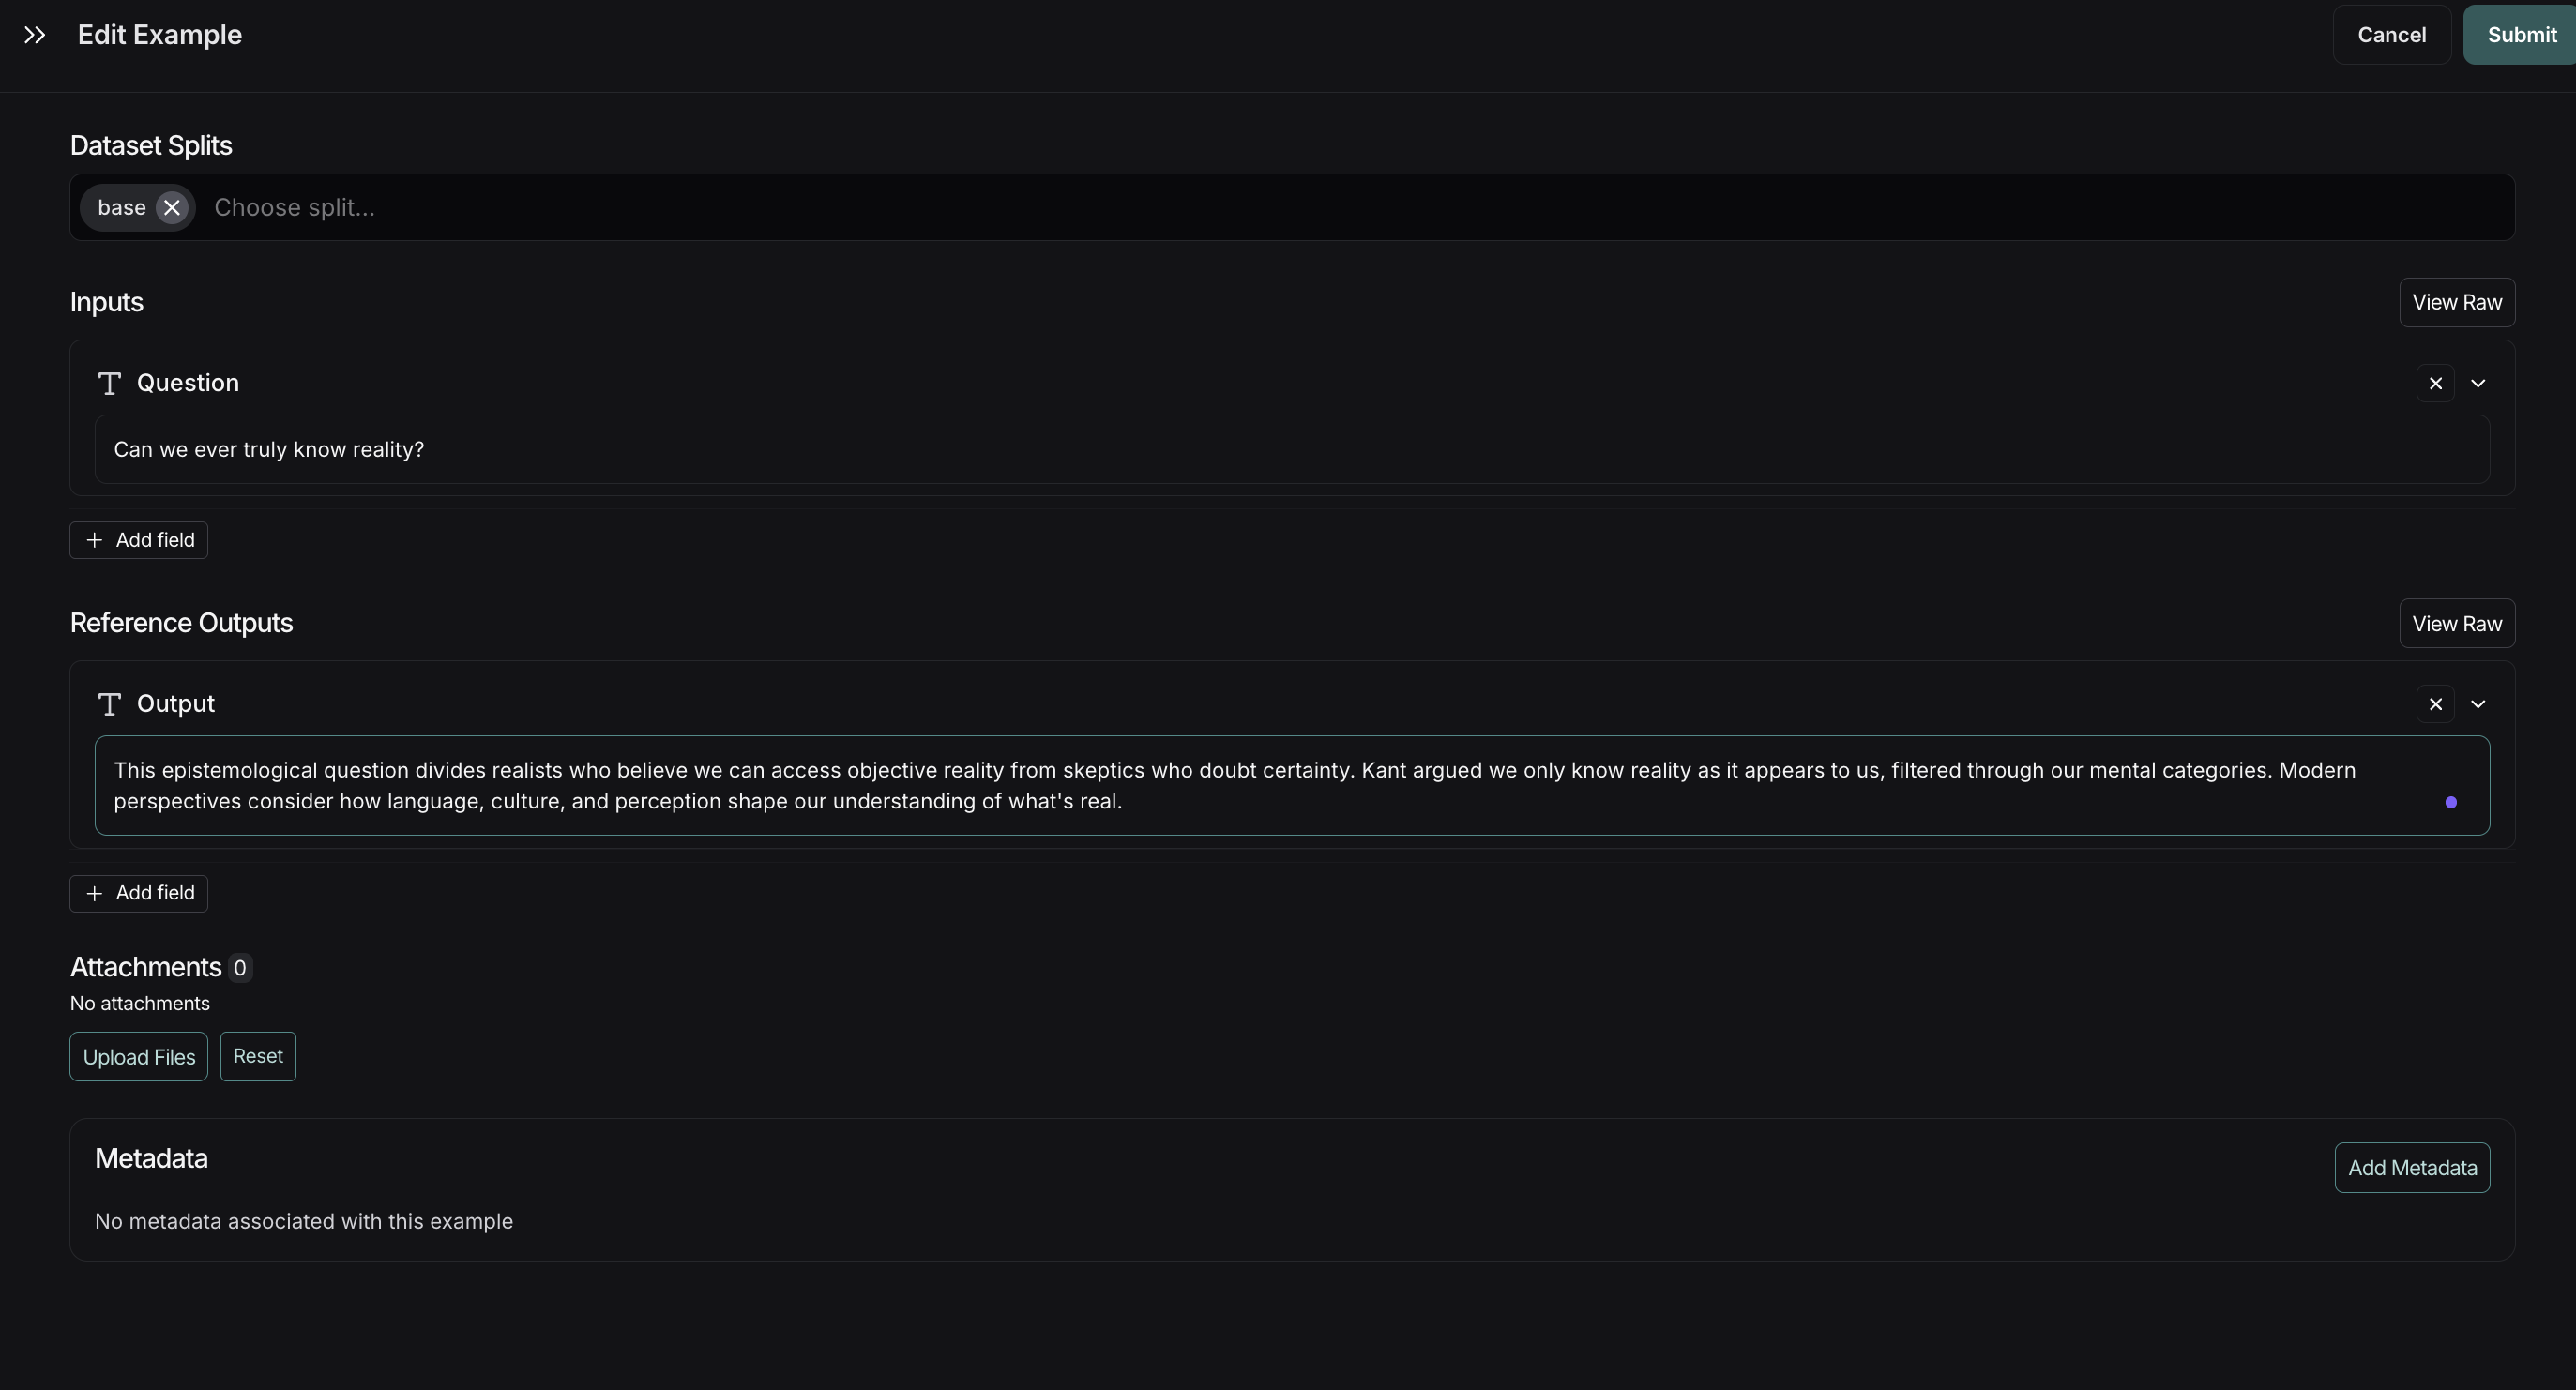

# wrote a code which populated a new dataset dataset with only inputs and no outputs

In [16]:
from langsmith import Client

example_inputs = [
"What is the meaning of life?",
"Is free will an illusion?",
"What is consciousness?",
"Can we ever truly know reality?",
"What makes an action morally right?",
"Is there an objective truth?",
"What is the nature of personal identity?",
"Does God exist?",
"What is justice?",
"Is knowledge justified true belief?"
]

client = Client()
# TODO: Fill in dataset name
dataset_name = "89caffd1-e9a8-46d4-8d0c-182e657c2273"

# Prepare inputs for bulk creation
inputs = [{"question": input_prompt} for input_prompt in example_inputs]

client.create_examples(
    inputs=inputs,
    outputs=None,
    dataset_id=dataset_name,
)

{'example_ids': ['5a89d52b-5fee-4b59-8498-8ebca351b801',
  '8b583ff0-1a37-4b1b-b480-2bdefb90ae8b',
  '9dcf92b3-407d-4e8b-a8bb-170e69156cfd',
  '5f7cd6fc-806b-48ae-a5cc-bbfcabd0685d',
  '761b6305-6c00-445a-a44e-fdafe8d55cf3',
  '14667362-8700-4ece-a44d-e363cd376861',
  'e48b2e4e-640e-4695-a59d-8c817bfa3c1b',
  'ac720de5-3e25-48c1-b38a-6c3f848b728f',
  '3db2e397-ea23-4e79-b2d0-0561224c5f54',
  '67cf6fd0-9603-4602-a935-3f488f5094b8'],
 'count': 10}


### MAT_496_2 contains only inputs and no outputs in the examples 


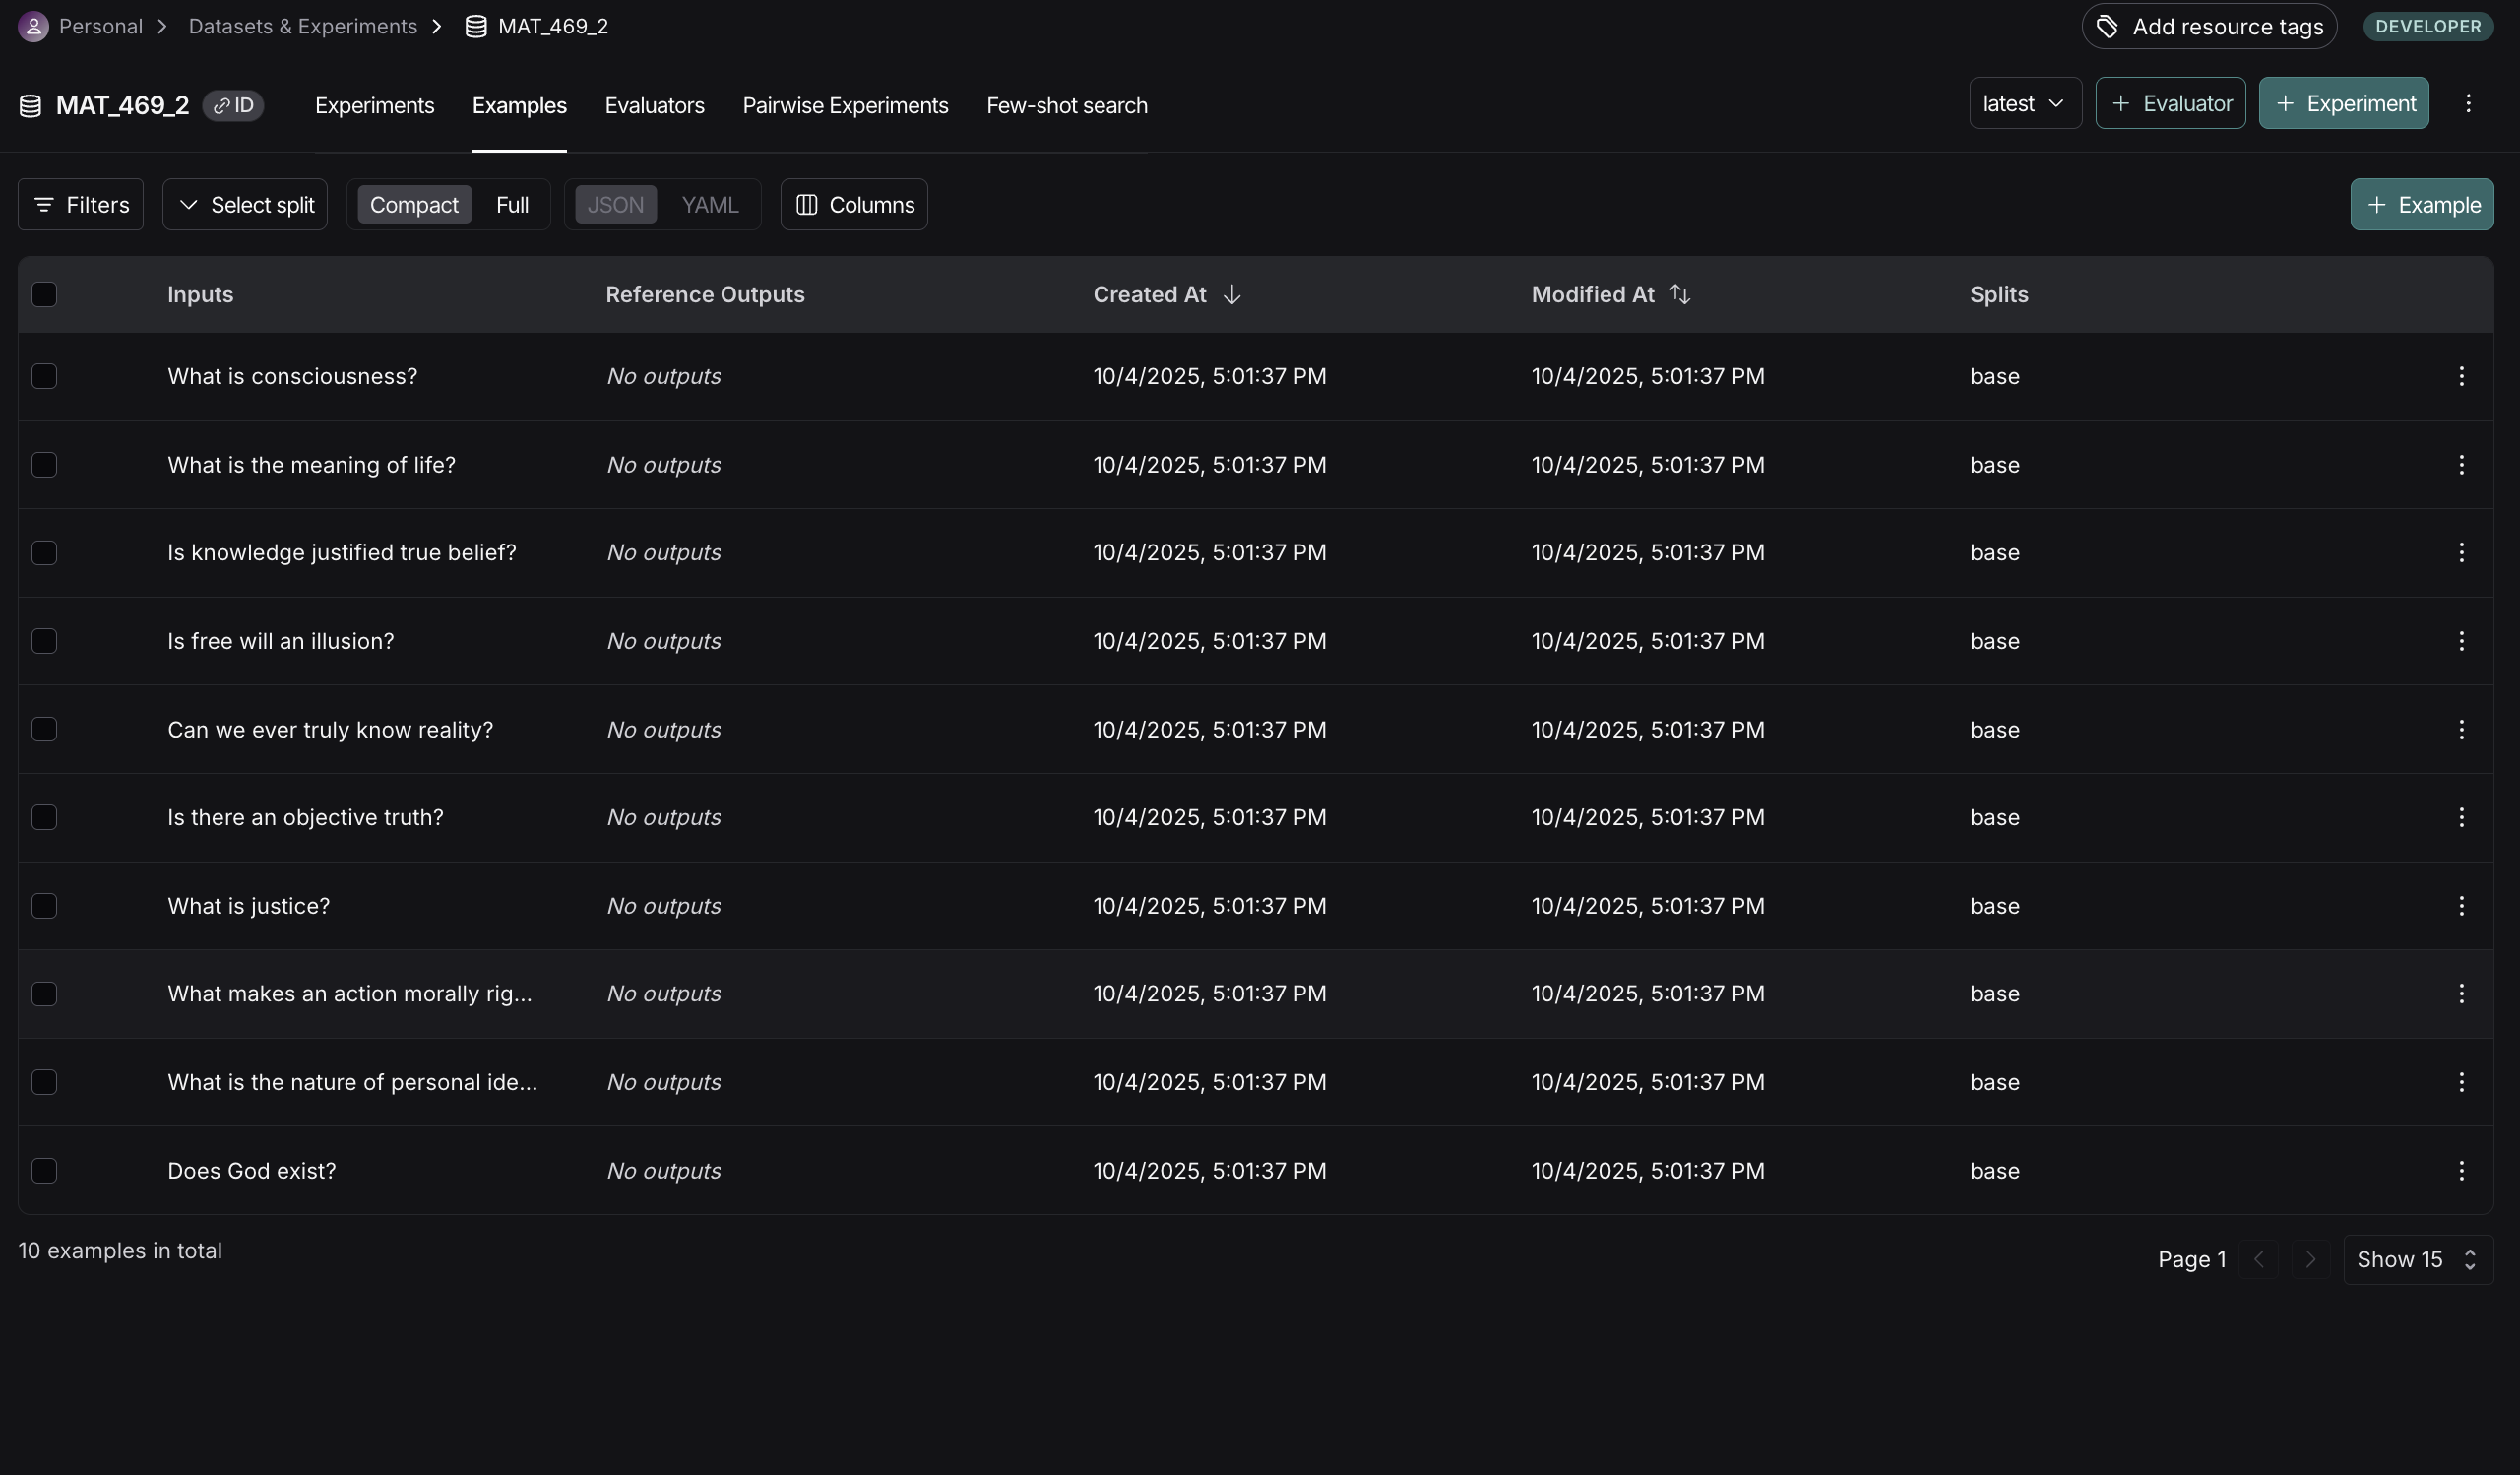